# Pregatire

In [78]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install scipy
! pip install math
! pip install scikit-learn
! pip install typing


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import chi2_contingency
import math

from copy import deepcopy
from typing import Optional, Dict, Callable

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from typing import List

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn import preprocessing

In [80]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.max_columns = 200
pd.set_option('display.width', 1000)

data_salary = pd.read_csv('tema2_SalaryPrediction/SalaryPrediction_full.csv')
data_credit = pd.read_csv('tema2_Credit_Risk/credit_risk_full.csv')

data_salary_train = pd.read_csv('tema2_SalaryPrediction/SalaryPrediction_train.csv')
data_credit_train = pd.read_csv('tema2_Credit_Risk/credit_risk_train.csv')

data_salary_test = pd.read_csv('tema2_SalaryPrediction/SalaryPrediction_test.csv')
data_credit_test = pd.read_csv('tema2_Credit_Risk/credit_risk_test.csv')

In [81]:
def show_numeric_details(data, column_name, final_attribute):
    b = data.boxplot(column=[column_name])
    plt.show()

    b = data.boxplot(column=column_name, by = final_attribute)
    plt.show()

    if final_attribute == 'money':
        print(data[data['money'] == '<=50K'].describe()[column_name])
        print()
        print(data[data['money'] == '>50K'].describe()[column_name])
    elif final_attribute == 'loan_approval_status':
        print(data[data['loan_approval_status'] == 'Approved'].describe()[column_name])
        print()
        print(data[data['loan_approval_status'] == 'Declined'].describe()[column_name])

def show_discrete_and_ordinal(data, column_name, final_attribute):
    data[column_name].hist(edgecolor='black', bins=20, figsize=(15,4), xrot = 90)
    plt.show()
    print(data[column_name].unique())
    print(data.value_counts(column_name))

# Salary Classification

In [82]:
data_salary

,fnl,hpw,relation,gain,country,job,edu_int,years,loss,work_type,partner,edu,gender,race,prod,gtype,money
0,264627,40.00000,NotM,0,United-States,Adm-clerical,10,38,0,Priv,D,SC,NaN,White,77,DC,<=50K
1,151369,40.00000,NotF,0,United-States,Craft-repair,9,62,0,LGov,NM,HSG,M,White,87,AC,<=50K
2,188615,60.00000,H,0,United-States,Sales,13,42,0,SelfInc,MCS,B,M,White,77,AC,>50K
3,151089,55.00000,H,0,United-States,Exec-managerial,10,41,2415,SelfInc,MCS,SC,M,White,107,AC,>50K
4,177625,40.00000,NotF,0,United-States,Machine-op-inspct,9,25,0,Priv,NM,HSG,M,White,57,AC,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,187487,40.00000,H,0,United-States,Machine-op-inspct,9,58,0,Priv,MCS,HSG,M,White,22,AC,<=50K
9995,400416,45.00000,OwnC,0,United-States,Machine-op-inspct,7,34,0,Priv,NM,11,M,Black,57,AC,<=50K
9996,87164,20.00000,Other,0,United-States,Sales,7,65,0,Priv,W,11,F,White,82,DC,<=50K
9997,22641,45.00000,H,0,United-States,Machine-op-inspct,9,29,0,Priv,MCS,HSG,M,Amer-Indian-Eskimo,62,AC,<=50K


## Date numerice

In [83]:
described_salary = data_salary.describe()
described_salary

,fnl,hpw,gain,edu_int,years,loss,prod
count,9999.00000,9199.00000,9999.00000,9999.00000,9999.00000,9999.00000,9999.00000
mean,190352.90209,40.41624,979.85339,14.26203,38.64686,84.11141,2014.92759
std,106070.86269,12.51736,7003.79538,24.77084,13.74510,394.03548,14007.60450
min,19214.00000,1.00000,0.00000,1.00000,17.00000,0.00000,-28.00000
25%,118282.50000,40.00000,0.00000,9.00000,28.00000,0.00000,42.00000
50%,178472.00000,40.00000,0.00000,10.00000,37.00000,0.00000,57.00000
75%,237311.00000,45.00000,0.00000,13.00000,48.00000,0.00000,77.00000
max,1455435.00000,99.00000,99999.00000,206.00000,90.00000,3770.00000,200125.00000


### fnl (Caracteristică socio-economică a populației din care provine individul)

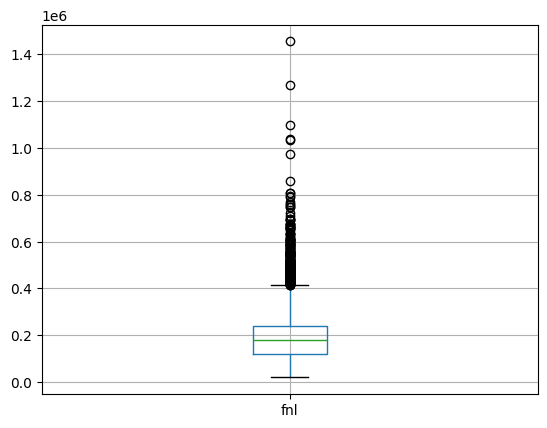

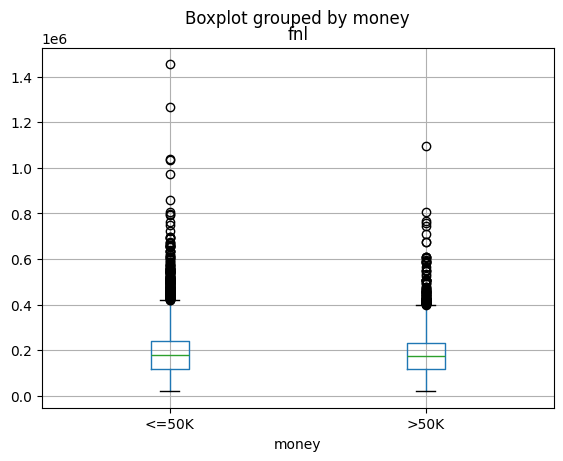

count      7591.00000
mean     190623.98419
std      106638.00497
min       19214.00000
25%      117854.50000
50%      180052.00000
75%      239145.50000
max     1455435.00000
Name: fnl, dtype: float64

count      2408.00000
mean     189498.34053
std      104280.09122
min       19302.00000
25%      119398.00000
50%      175804.00000
75%      231566.50000
max     1097453.00000
Name: fnl, dtype: float64


In [84]:
show_numeric_details(data_salary, 'fnl', 'money')

### hpw (Număr de ore de muncă pe săptămână)

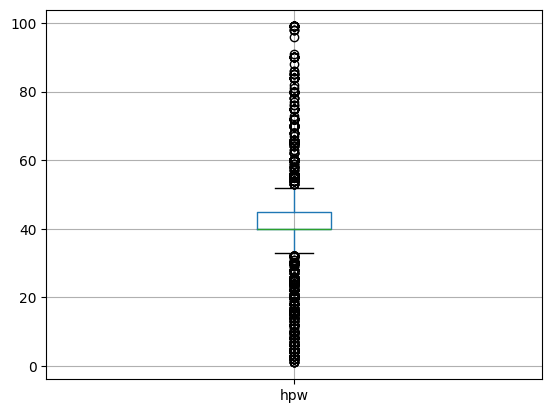

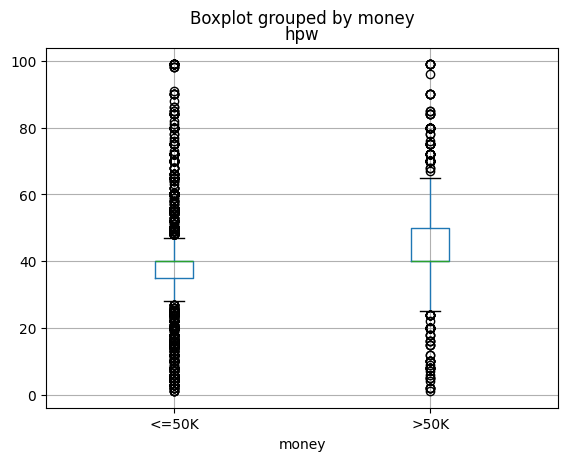

count   6988.00000
mean      38.86319
std       12.50687
min        1.00000
25%       35.00000
50%       40.00000
75%       40.00000
max       99.00000
Name: hpw, dtype: float64

count   2211.00000
mean      45.32474
std       11.21846
min        1.00000
25%       40.00000
50%       40.00000
75%       50.00000
max       99.00000
Name: hpw, dtype: float64


In [85]:
show_numeric_details(data_salary, 'hpw', 'money')

### gain (Câștigul de capital)

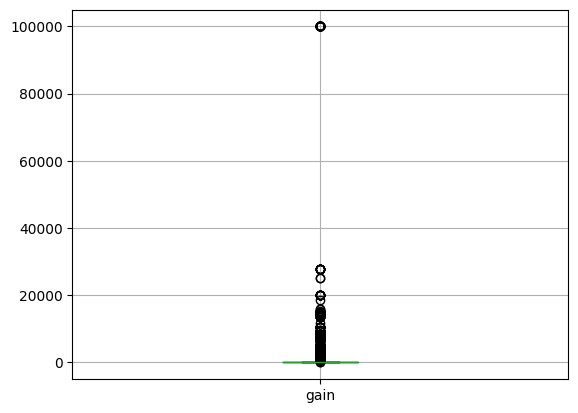

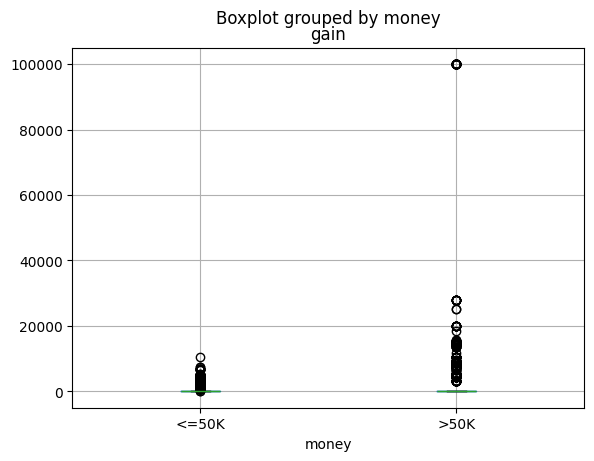

count    7591.00000
mean      122.01673
std       674.37591
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max     10566.00000
Name: gain, dtype: float64

count    2408.00000
mean     3684.10507
std     13880.99828
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max     99999.00000
Name: gain, dtype: float64


In [86]:
show_numeric_details(data_salary, 'gain', 'money')

### edu_int (Numărul de ani de studiu)

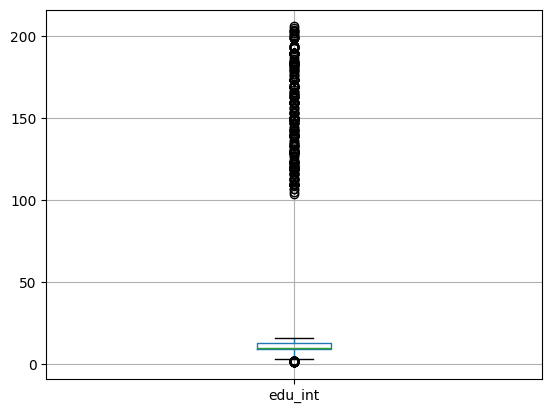

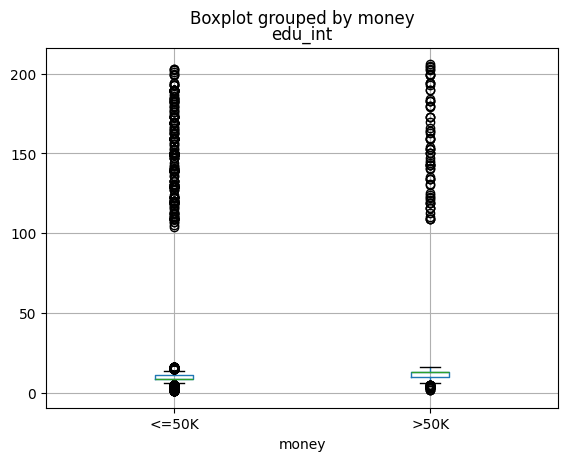

count   7591.00000
mean      13.74522
std       24.58773
min        1.00000
25%        9.00000
50%        9.00000
75%       11.00000
max      203.00000
Name: edu_int, dtype: float64

count   2408.00000
mean      15.89120
std       25.27549
min        2.00000
25%       10.00000
50%       13.00000
75%       13.00000
max      206.00000
Name: edu_int, dtype: float64


In [87]:
show_numeric_details(data_salary, 'edu_int', 'money')

### years (Vârsta individului)

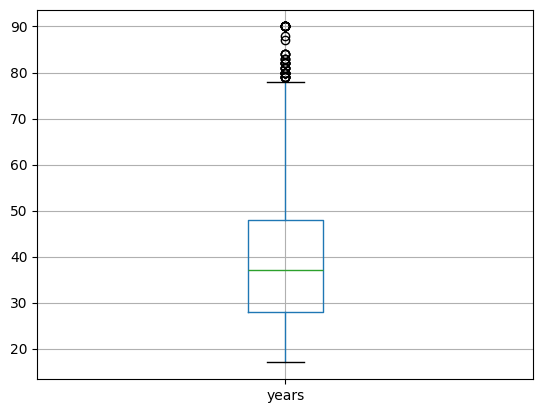

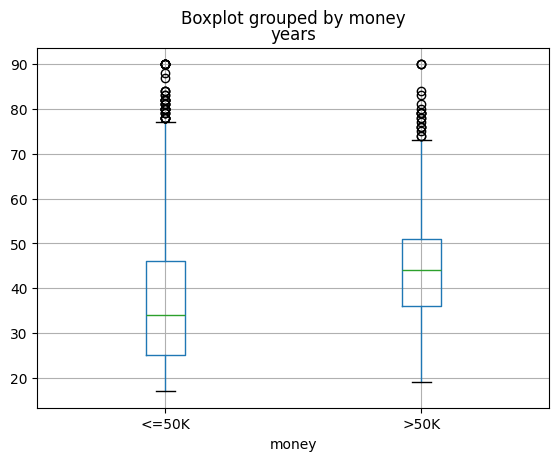

count   7591.00000
mean      36.85957
std       14.14134
min       17.00000
25%       25.00000
50%       34.00000
75%       46.00000
max       90.00000
Name: years, dtype: float64

count   2408.00000
mean      44.28115
std       10.59863
min       19.00000
25%       36.00000
50%       44.00000
75%       51.00000
max       90.00000
Name: years, dtype: float64


In [88]:
show_numeric_details(data_salary, 'years', 'money')

### loss (Pierderea de capital)

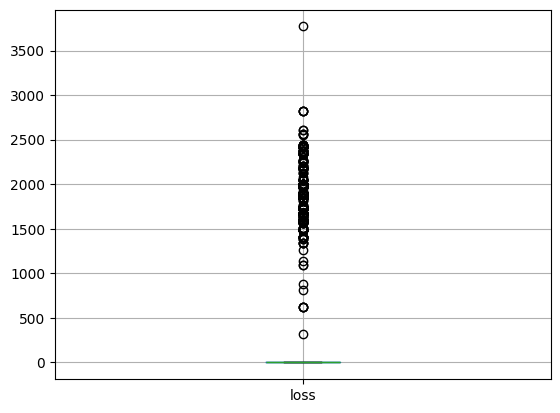

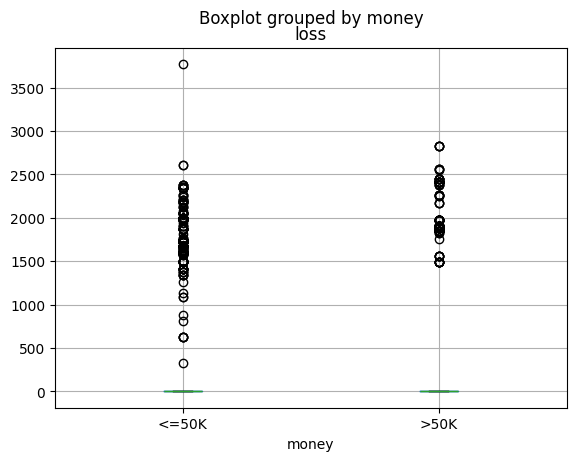

count   7591.00000
mean      56.66935
std      317.59182
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max     3770.00000
Name: loss, dtype: float64

count   2408.00000
mean     170.62002
std      563.03146
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max     2824.00000
Name: loss, dtype: float64


In [89]:
show_numeric_details(data_salary, 'loss', 'money')

### prod (Producerea de capital)

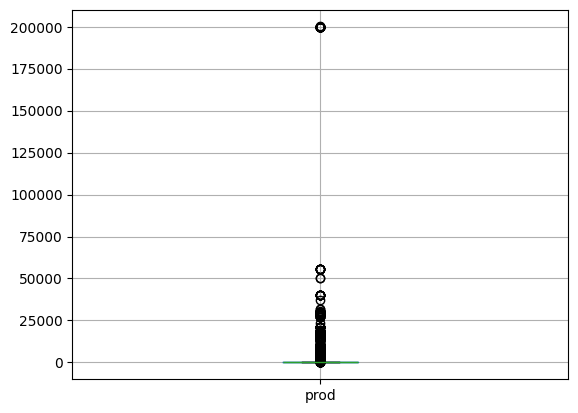

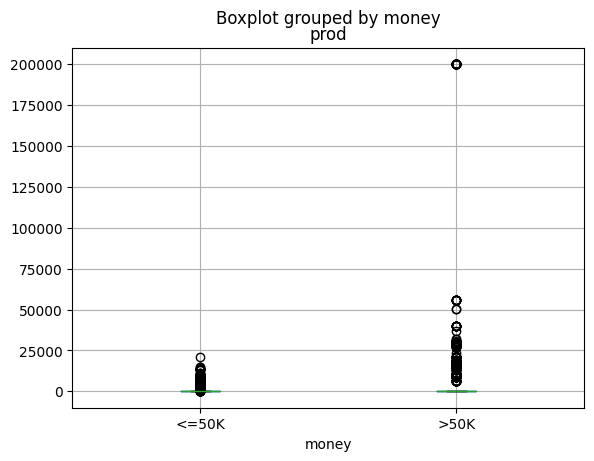

count    7591.00000
mean      299.23791
std      1348.93775
min       -28.00000
25%        37.00000
50%        57.00000
75%        72.00000
max     21179.00000
Name: prod, dtype: float64

count     2408.00000
mean      7423.48256
std      27761.98362
min        -23.00000
25%         42.00000
50%         62.00000
75%         97.00000
max     200125.00000
Name: prod, dtype: float64


In [90]:
show_numeric_details(data_salary, 'prod', 'money')

## Atribute discrete si ordinale

In [91]:
salary_described_category = data_salary.describe(include=['O'])
salary_described_category

,relation,country,job,work_type,partner,edu,gender,race,gtype,money
count,9999,9999,9999,9999,9999,9999,9199,9999,9999,9999
unique,6,41,14,9,7,16,2,5,2,2
top,H,United-States,Craft-repair,Priv,MCS,HSG,M,White,AC,<=50K
freq,4097,8978,1277,6940,4667,3178,6179,8588,6711,7591


### relation

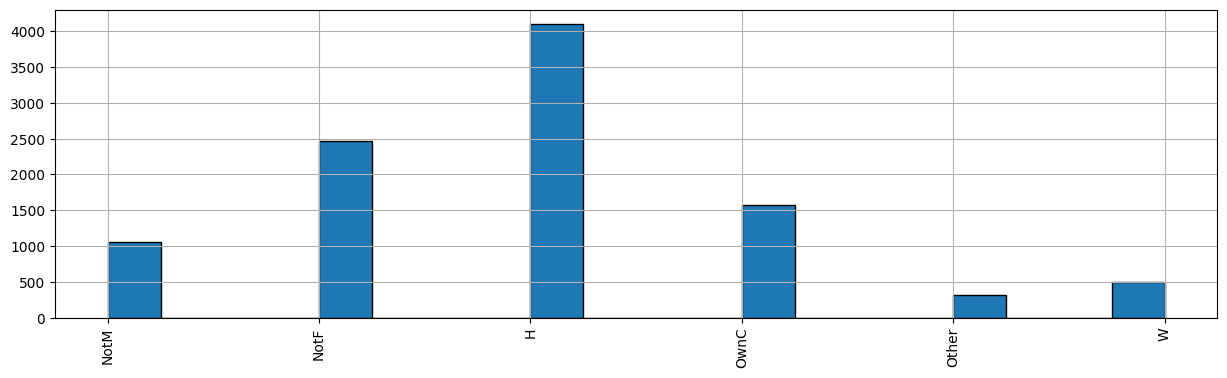

['NotM' 'NotF' 'H' 'OwnC' 'Other' 'W']
relation
H        4097
NotF     2468
OwnC     1573
NotM     1054
W         491
Other     316
Name: count, dtype: int64


In [92]:
show_discrete_and_ordinal(data_salary, 'relation', 'money')

### country

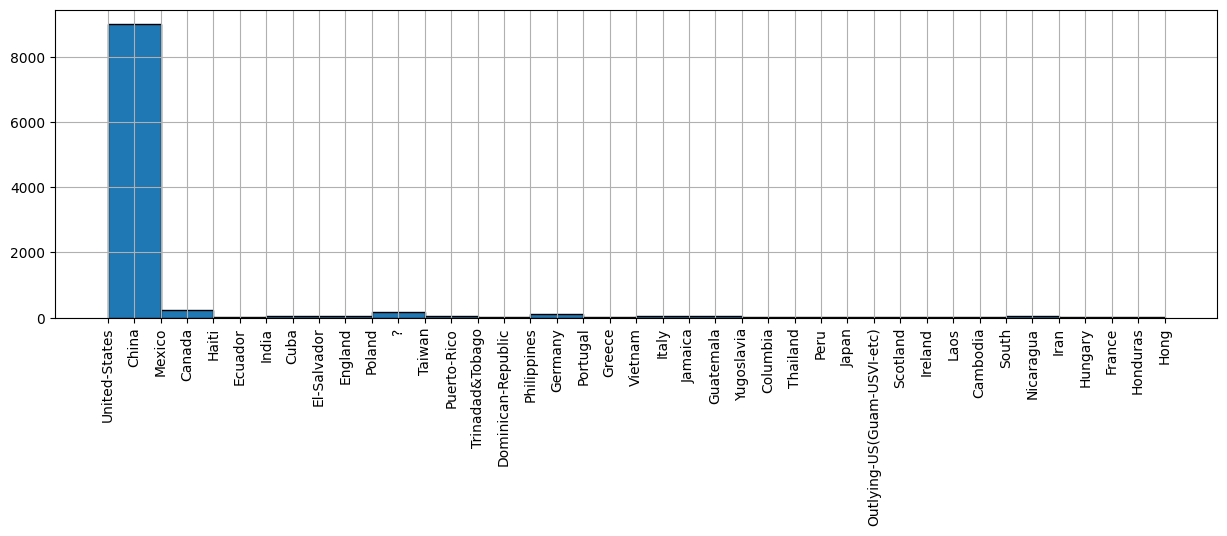

['United-States' 'China' 'Mexico' 'Canada' 'Haiti' 'Ecuador' 'India'
 'Cuba' 'El-Salvador' 'England' 'Poland' '?' 'Taiwan' 'Puerto-Rico'
 'Trinadad&Tobago' 'Dominican-Republic' 'Philippines' 'Germany' 'Portugal'
 'Greece' 'Vietnam' 'Italy' 'Jamaica' 'Guatemala' 'Yugoslavia' 'Columbia'
 'Thailand' 'Peru' 'Japan' 'Outlying-US(Guam-USVI-etc)' 'Scotland'
 'Ireland' 'Laos' 'Cambodia' 'South' 'Nicaragua' 'Iran' 'Hungary' 'France'
 'Honduras' 'Hong']
country
United-States                 8978
Mexico                         193
?                              158
Philippines                     61
Germany                         41
Canada                          40
Cuba                            34
Puerto-Rico                     33
England                         29
India                           28
Vietnam                         28
South                           27
El-Salvador                     26
Italy                           24
Dominican-Republic              24
China              

In [93]:
show_discrete_and_ordinal(data_salary, 'country', 'money')

### job

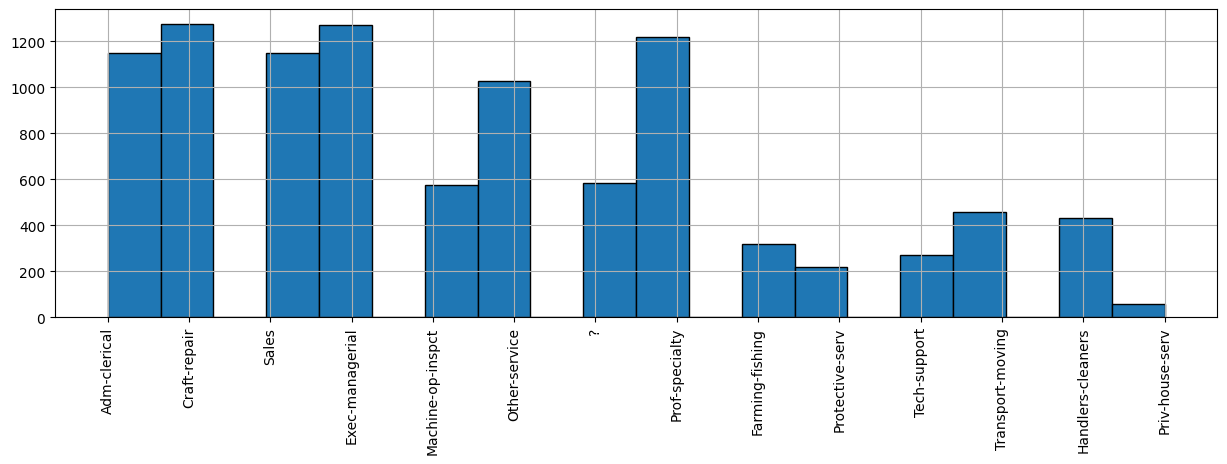

['Adm-clerical' 'Craft-repair' 'Sales' 'Exec-managerial'
 'Machine-op-inspct' 'Other-service' '?' 'Prof-specialty'
 'Farming-fishing' 'Protective-serv' 'Tech-support' 'Transport-moving'
 'Handlers-cleaners' 'Priv-house-serv']
job
Craft-repair         1277
Exec-managerial      1271
Prof-specialty       1219
Sales                1150
Adm-clerical         1148
Other-service        1029
?                     582
Machine-op-inspct     575
Transport-moving      456
Handlers-cleaners     432
Farming-fishing       316
Tech-support          270
Protective-serv       219
Priv-house-serv        55
Name: count, dtype: int64


In [94]:
show_discrete_and_ordinal(data_salary, 'job', 'money')

### work_type

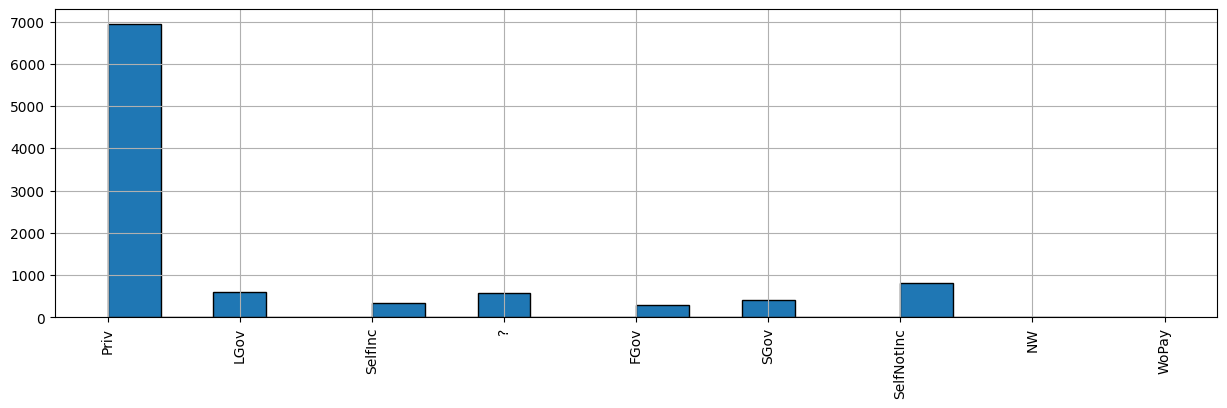

['Priv' 'LGov' 'SelfInc' '?' 'FGov' 'SGov' 'SelfNotInc' 'NW' 'WoPay']
work_type
Priv          6940
SelfNotInc     805
LGov           611
?              580
SGov           417
SelfInc        335
FGov           304
WoPay            5
NW               2
Name: count, dtype: int64


In [95]:
show_discrete_and_ordinal(data_salary, 'work_type', 'money')

### partner

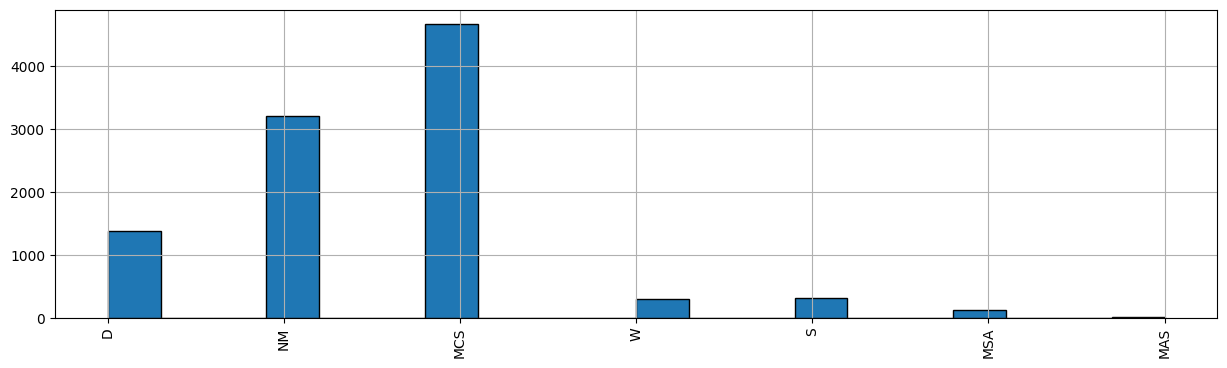

['D' 'NM' 'MCS' 'W' 'S' 'MSA' 'MAS']
partner
MCS    4667
NM     3209
D      1378
S       314
W       303
MSA     123
MAS       5
Name: count, dtype: int64


In [96]:
show_discrete_and_ordinal(data_salary, 'partner', 'money')

### edu

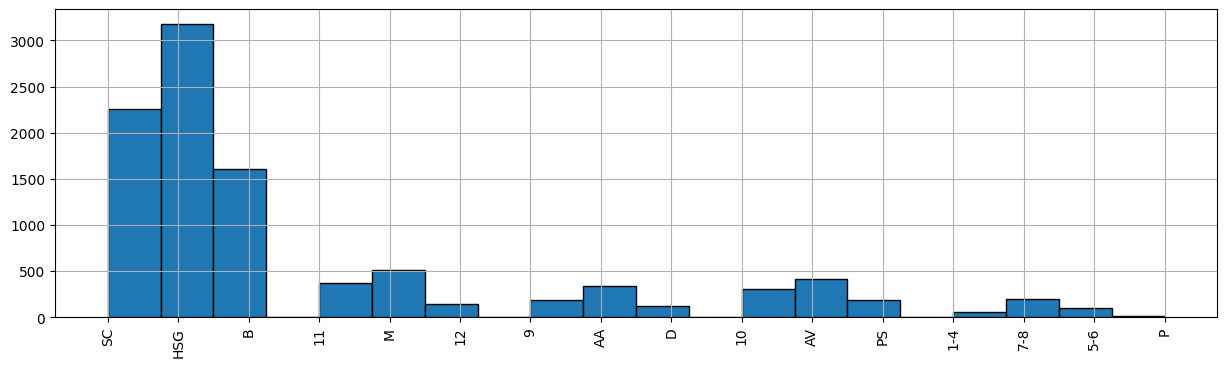

['SC' 'HSG' 'B' '11' 'M' '12' '9' 'AA' 'D' '10' 'AV' 'PS' '1-4' '7-8'
 '5-6' 'P']
edu
HSG    3178
SC     2261
B      1613
M       509
AV      412
11      370
AA      341
10      306
7-8     196
PS      187
9       184
12      144
D       121
5-6     105
1-4      55
P        17
Name: count, dtype: int64


In [97]:
show_discrete_and_ordinal(data_salary, 'edu', 'money')

### gender

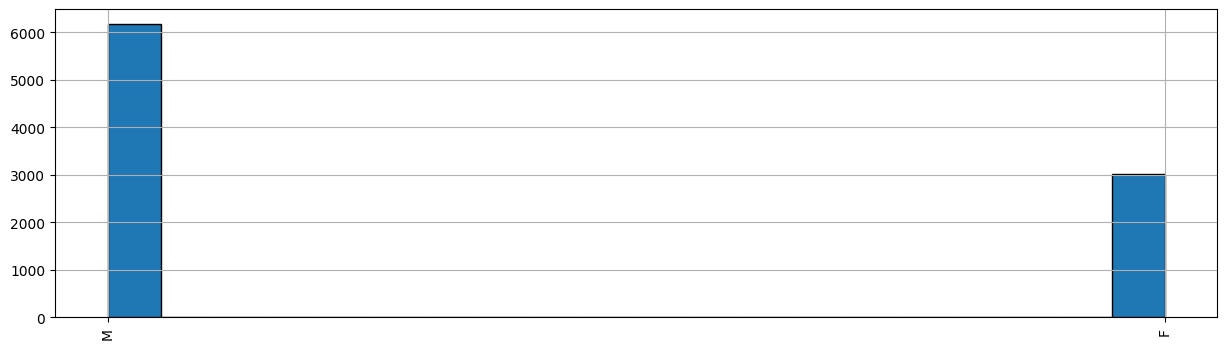

[nan 'M' 'F']
gender
M    6179
F    3020
Name: count, dtype: int64


In [98]:
show_discrete_and_ordinal(data_salary, 'gender', 'money')

### race

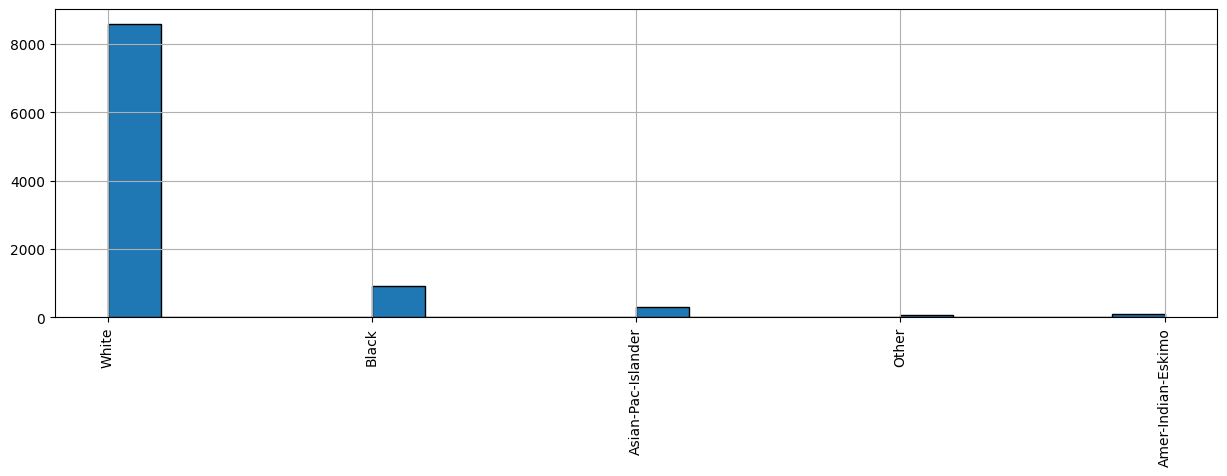

['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
race
White                 8588
Black                  924
Asian-Pac-Islander     310
Amer-Indian-Eskimo     100
Other                   77
Name: count, dtype: int64


In [99]:
show_discrete_and_ordinal(data_salary, 'race', 'money')

### gtype (Tipul contractului de munca)

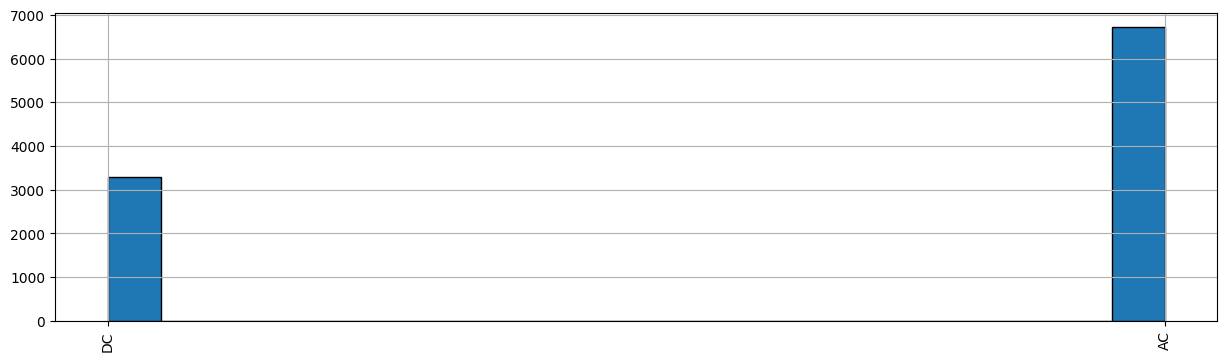

['DC' 'AC']
gtype
AC    6711
DC    3288
Name: count, dtype: int64


In [100]:
show_discrete_and_ordinal(data_salary, 'gtype', 'money')

## Analiza echilibrului de clase

In [101]:
def show_equilibrium_graph(column_name):
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    g1 = sns.countplot(x=column_name, hue='money', data=data_salary_train, ax=ax[0], order=data_salary_train.sort_values(column_name, ascending=False)[column_name])
    g2 = sns.countplot(x=column_name, hue='money', data=data_salary_test, ax=ax[1], order=data_salary_test.sort_values(column_name, ascending=False)[column_name])
    g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
    g2.set_xticklabels(g2.get_xticklabels(), rotation=80)
    plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


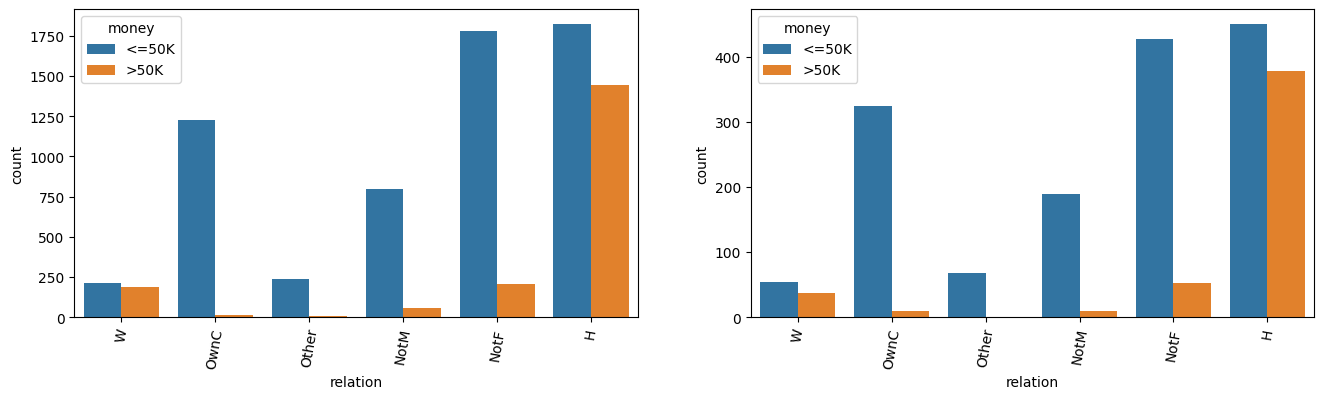

C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


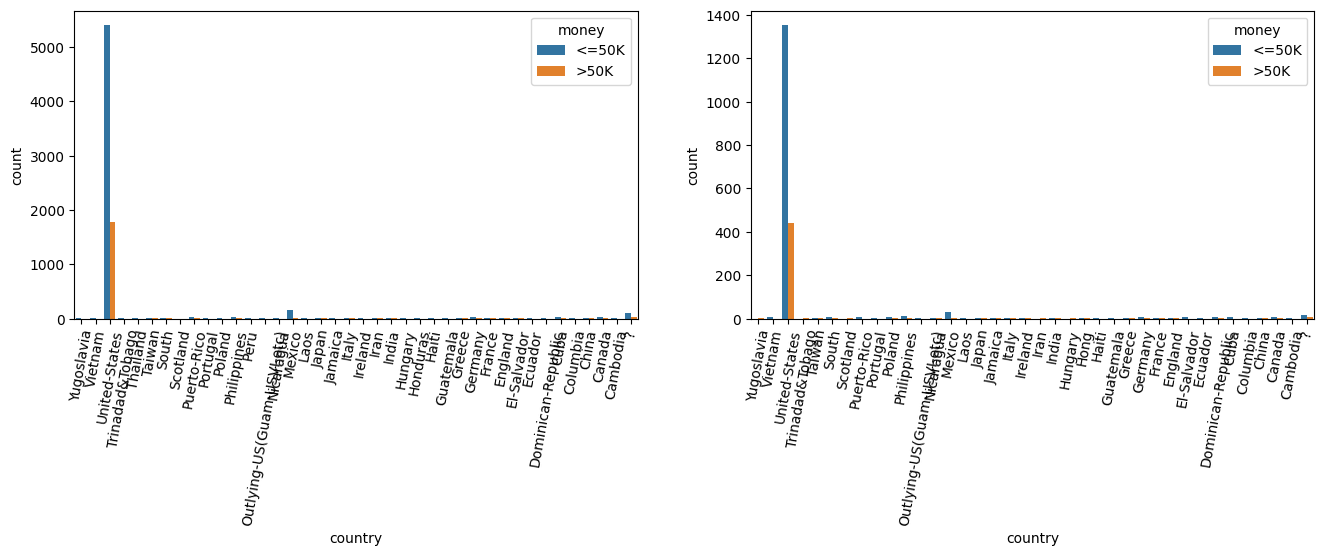

C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


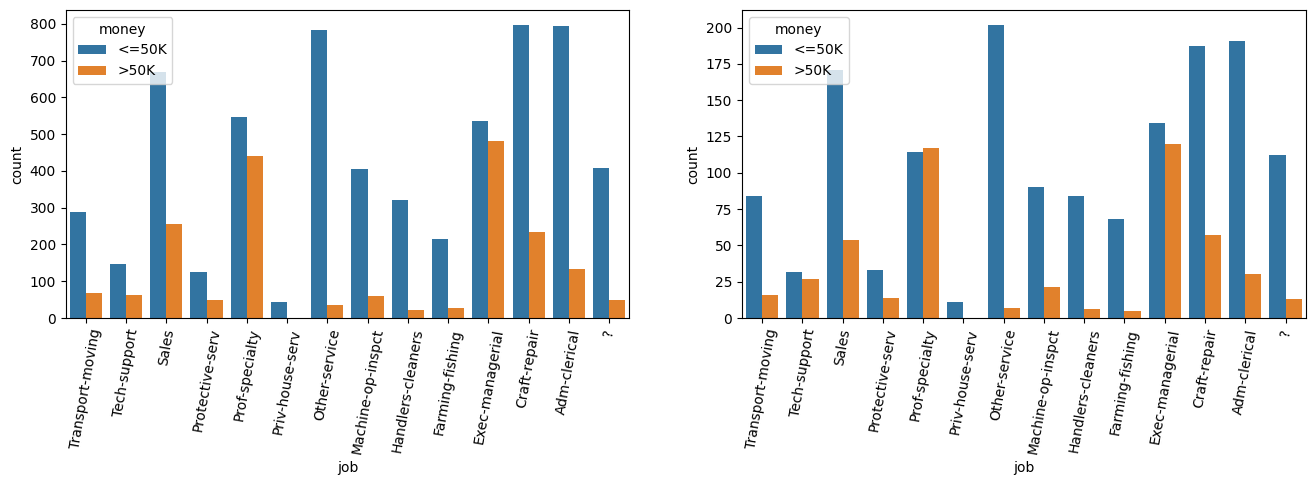

C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


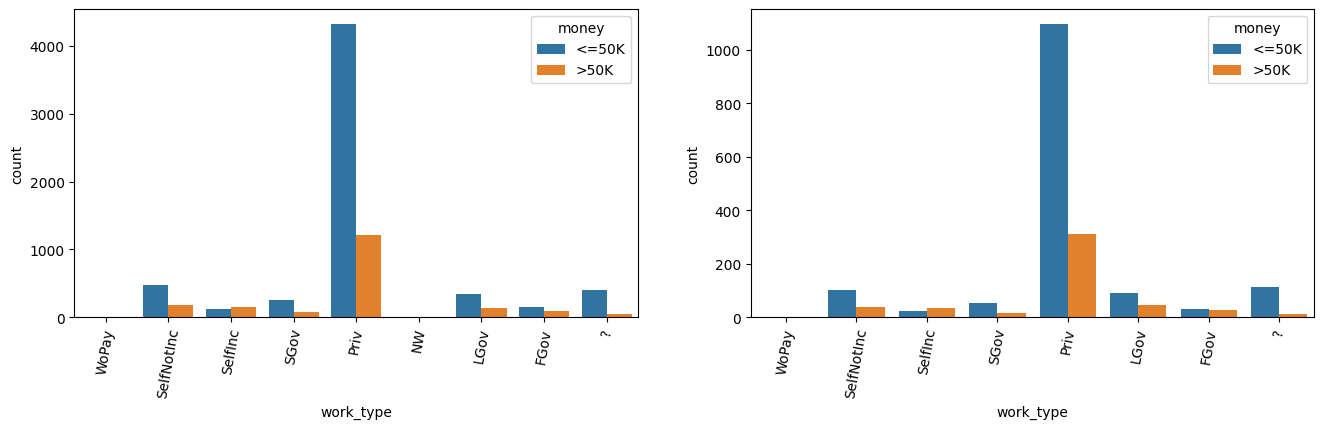

C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


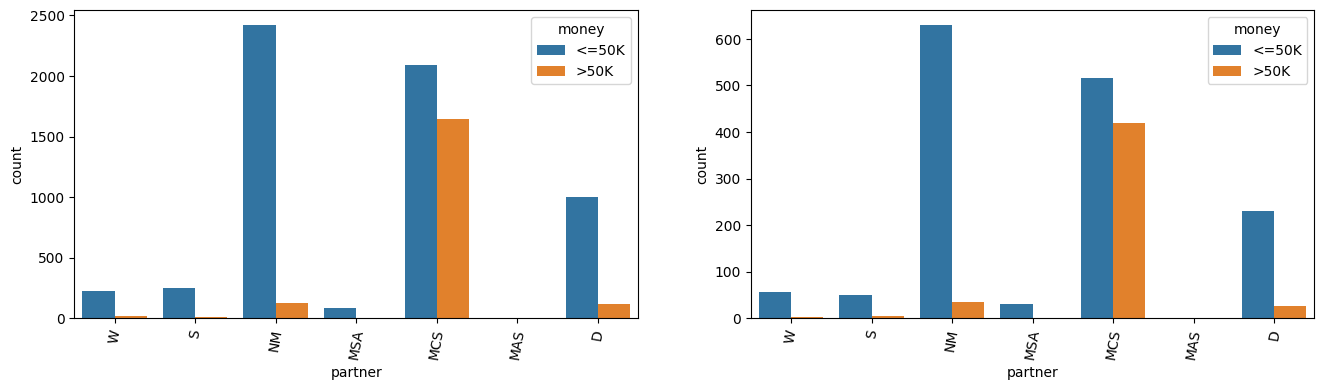

C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


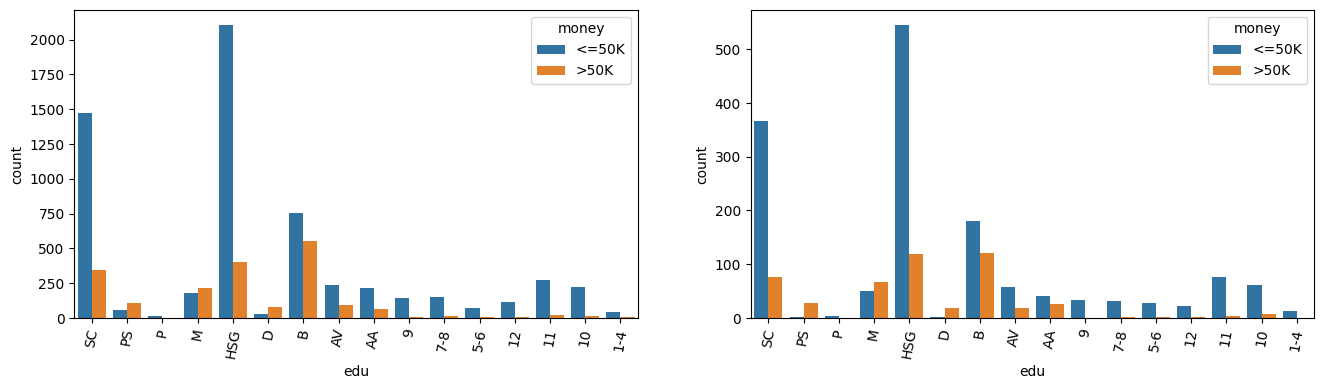

C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


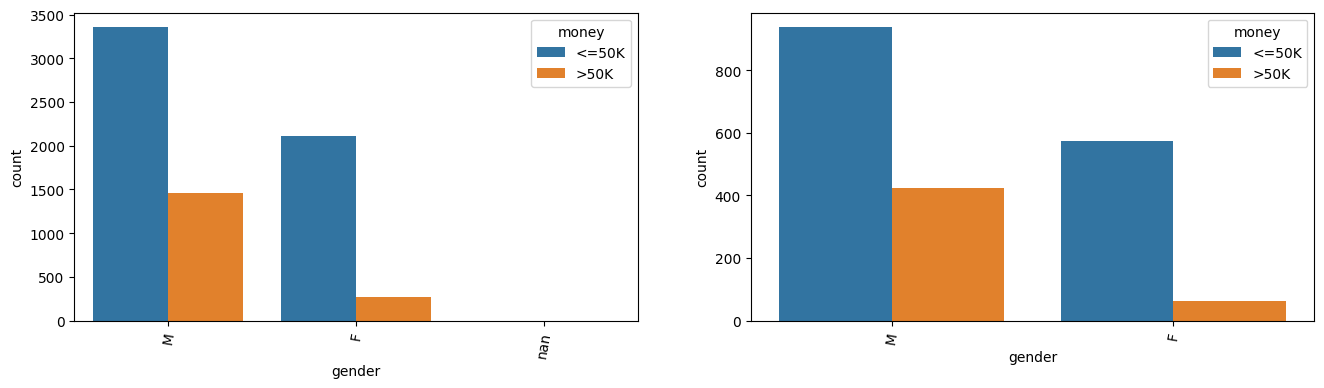

C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


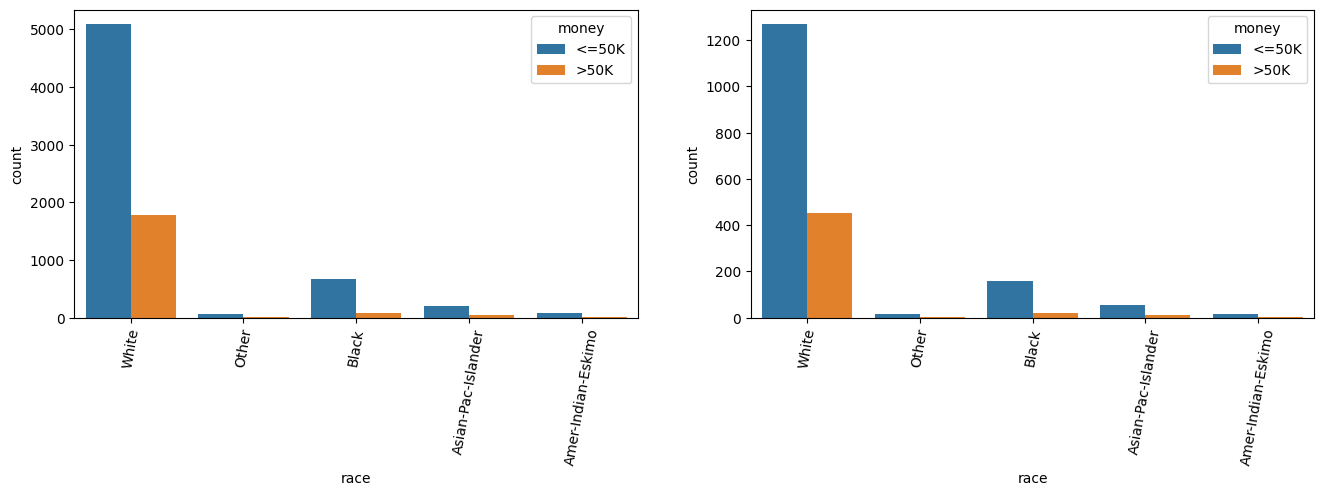

C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\1654281339.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


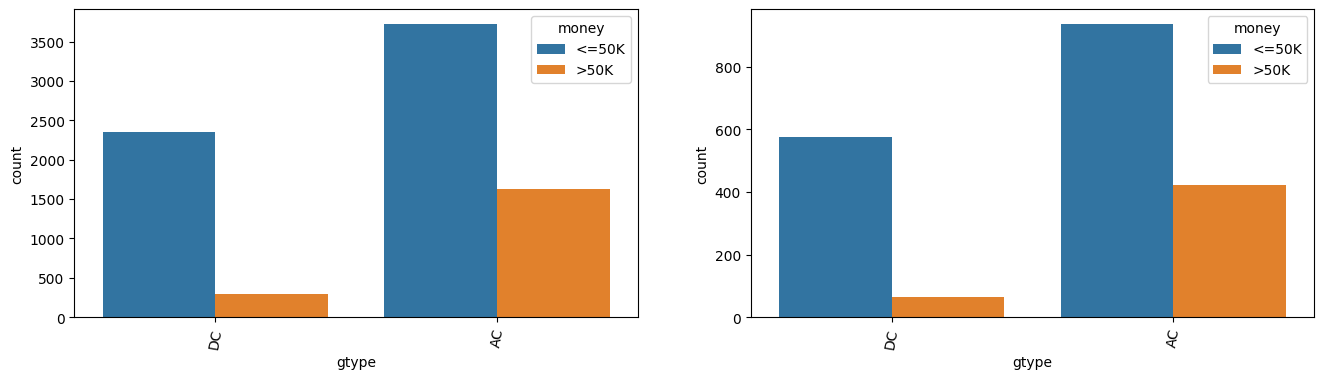

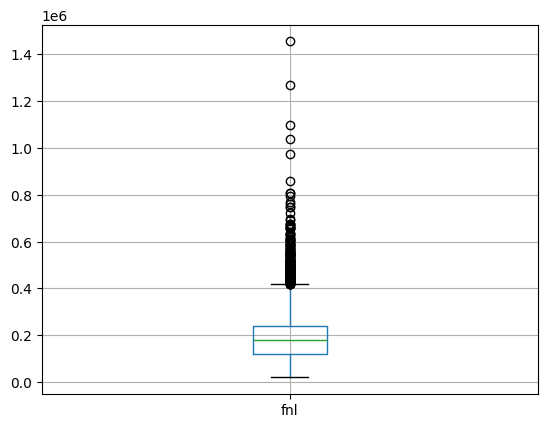

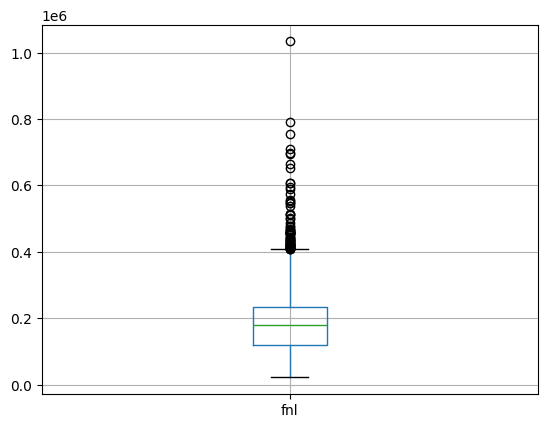

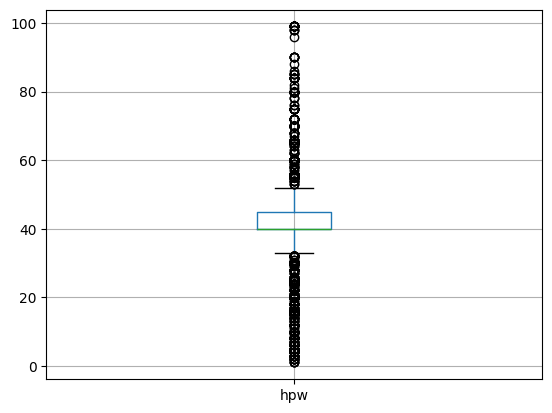

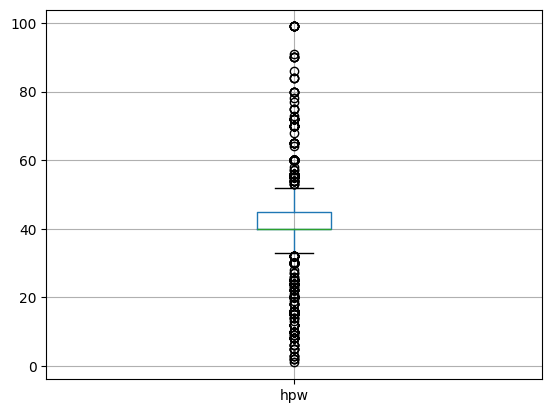

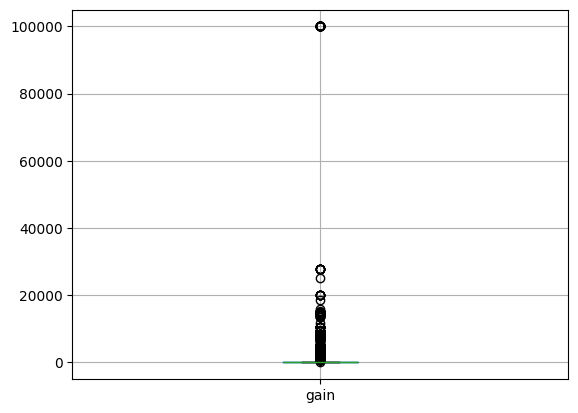

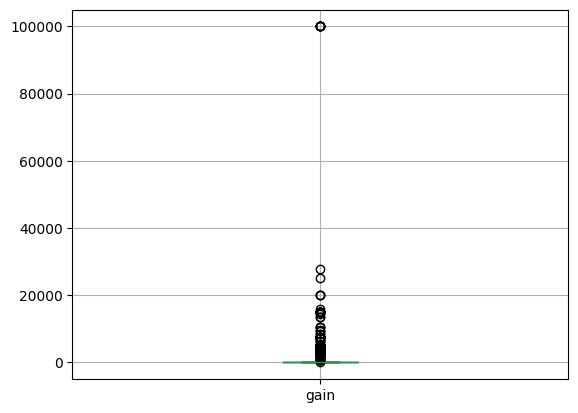

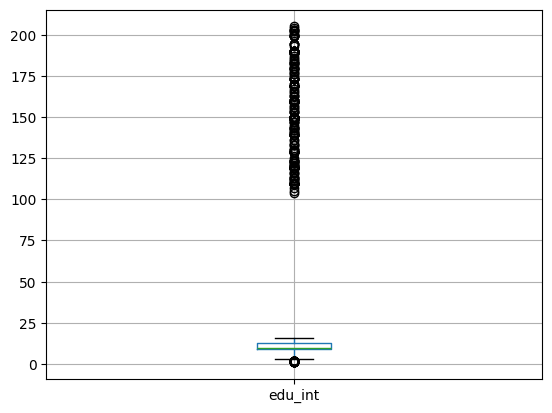

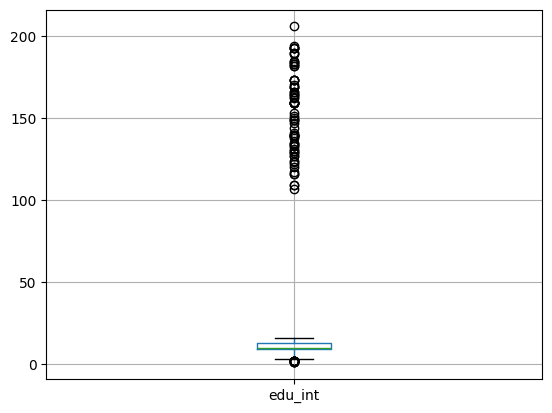

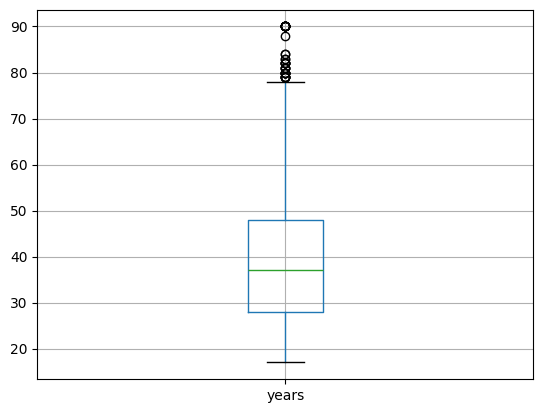

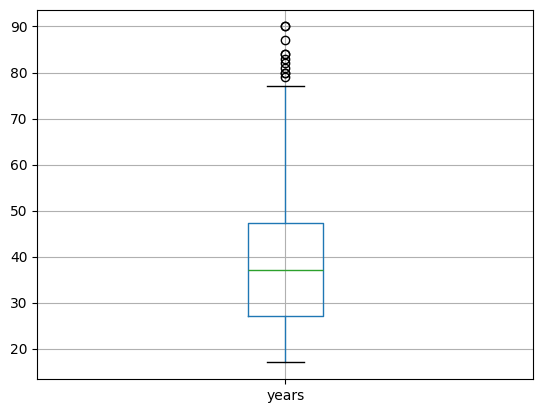

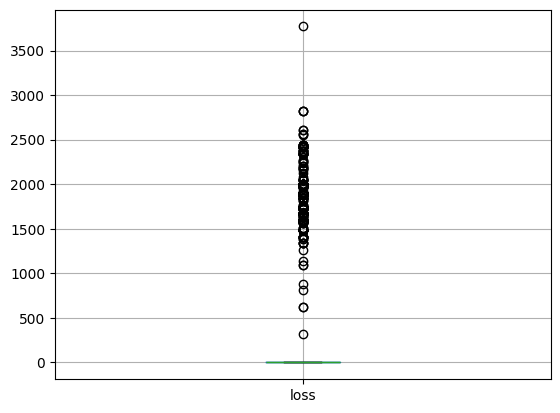

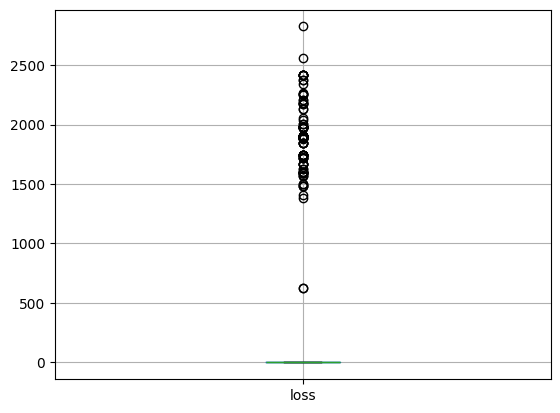

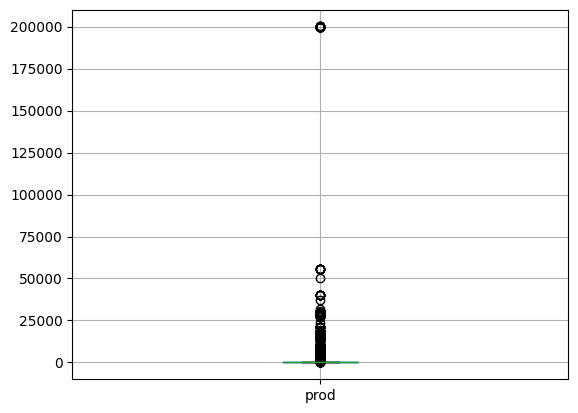

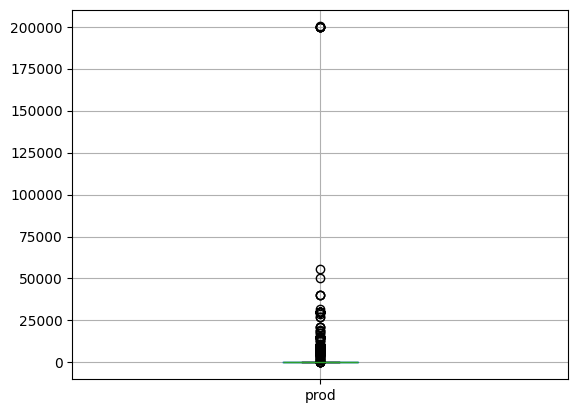

In [102]:
# fig, ax = plt.subplots(1,2, figsize=(16,4))
# sns.countplot(x="race", hue='money', data=data_salary_train, ax=ax[0], order=data_salary_train.sort_values('race', ascending=False)['race'])
# sns.countplot(x="race", hue='money', data=data_salary_test, ax=ax[1], order=data_salary_test.sort_values('race', ascending=False)['race'])
# plt.show()

data_salary_categorical_only = data_salary.select_dtypes(exclude=np.number)
data_salary_categorical_only = data_salary_categorical_only[data_salary_categorical_only.columns[~data_salary_categorical_only.columns.isin(['money'])]]
for col in data_salary_categorical_only.columns:
    show_equilibrium_graph(col)

data_salary_numerics_only = data_salary.select_dtypes(include=np.number)
for col in data_salary_numerics_only:
    b1 = data_salary_train.boxplot(column=[col])
    plt.show()

    b2 = data_salary_test.boxplot(column=col)
    plt.show()
    # fig, ax = plt.subplots(1,2, figsize=(16,4))
    # fig.suptitle(col)
    # ax[0].boxplot(x=col, data=data_salary_train)#data_salary_train.boxplot(column=col)
    # ax[1].boxplot(x=col, data=data_salary_test)
    # plt.show()

## Correlations

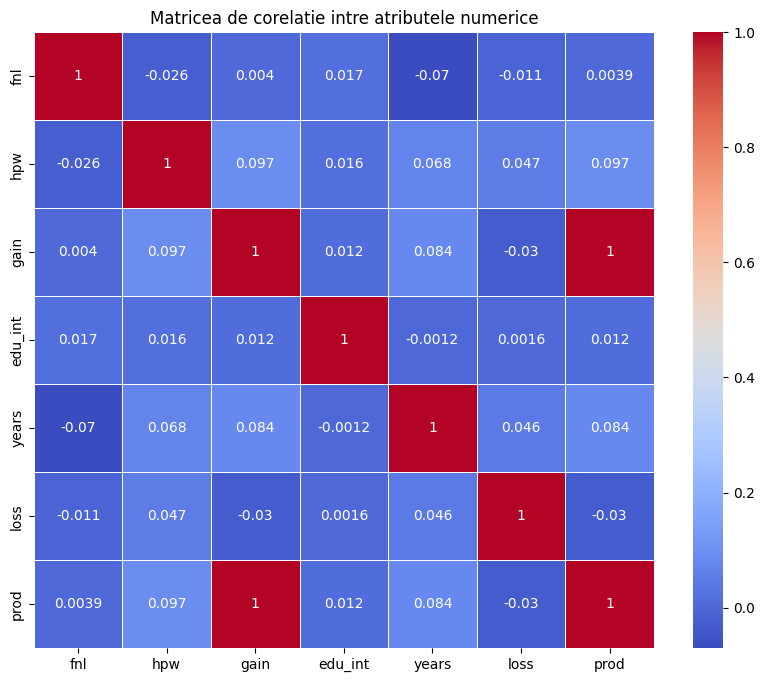

             fnl      hpw     gain  edu_int    years     loss     prod
fnl      1.00000 -0.02561  0.00396  0.01693 -0.07032 -0.01145  0.00395
hpw     -0.02561  1.00000  0.09657  0.01634  0.06807  0.04741  0.09658
gain     0.00396  0.09657  1.00000  0.01216  0.08411 -0.02987  1.00000
edu_int  0.01693  0.01634  0.01216  1.00000 -0.00116  0.00161  0.01215
years   -0.07032  0.06807  0.08411 -0.00116  1.00000  0.04578  0.08416
loss    -0.01145  0.04741 -0.02987  0.00161  0.04578  1.00000 -0.02986
prod     0.00395  0.09658  1.00000  0.01215  0.08416 -0.02986  1.00000


In [103]:
data_salary_numerics_only = data_salary.select_dtypes(include=np.number)
correlations = data_salary_numerics_only.corr()
cols = data_salary_numerics_only.columns.tolist()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matricea de corelatie intre atributele numerice')
plt.show()

# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
# ticks = np.arange(0,len(cols),1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(cols)
# ax.set_yticklabels(cols)
# plt.show()

print(correlations)

In [104]:
# chi2 = []
# data_salary_categorical_only = data_salary.select_dtypes(exclude=np.number)
# data_salary_categorical_only = data_salary_categorical_only[data_salary_categorical_only.columns[~data_salary_categorical_only.columns.isin(['money'])]]
# # print(data_salary_categorical_only)
# for col1 in data_salary_categorical_only.columns:
#     for col2 in data_salary_categorical_only.columns:
#         CrosstabResult = pd.crosstab(index=data_salary[col1],columns=data_salary[col2])
#         ChiSqResult = chi2_contingency(CrosstabResult)
#         chi2.append(ChiSqResult[1])
#         # print(f"%.40f" %ChiSqResult[1])

# chi2 = np.reshape(chi2, (int(math.sqrt(len(chi2))), int(math.sqrt(len(chi2)))))
# df = pd.DataFrame(data=chi2, index=data_salary_categorical_only.columns, columns=data_salary_categorical_only.columns)

data_salary_categorical_only = data_salary.select_dtypes(exclude=np.number)
data_salary_categorical_only = data_salary_categorical_only[data_salary_categorical_only.columns[~data_salary_categorical_only.columns.isin(['money'])]]
def is_correlated(x, y):
    CrosstabResult = pd.crosstab(index=data_salary[x], columns=data_salary[y])
    ChiSqResult = chi2_contingency(CrosstabResult)
    p, x = ChiSqResult[1], "correlated" if ChiSqResult[1] < 0.05 else "not-correlated"
    return p, x

chi2 = []
for col1 in data_salary_categorical_only:
    for col2 in data_salary_categorical_only:
        chi2.append(is_correlated(col1, col2)[1])

chi2 = np.reshape(chi2, (int(math.sqrt(len(chi2))), int(math.sqrt(len(chi2)))))
df = pd.DataFrame(data=chi2, index=data_salary_categorical_only.columns, columns=data_salary_categorical_only.columns)
print(df)
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# cax = ax.matshow(df, vmin=-1, vmax=1)
# fig.colorbar(cax)
# ticks = np.arange(0,len(cols),1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(cols)
# ax.set_yticklabels(cols)
# plt.show()

# print(df)

             relation         country         job       work_type     partner         edu      gender        race       gtype
relation   correlated      correlated  correlated      correlated  correlated  correlated  correlated  correlated  correlated
country    correlated      correlated  correlated  not-correlated  correlated  correlated  correlated  correlated  correlated
job        correlated      correlated  correlated      correlated  correlated  correlated  correlated  correlated  correlated
work_type  correlated  not-correlated  correlated      correlated  correlated  correlated  correlated  correlated  correlated
partner    correlated      correlated  correlated      correlated  correlated  correlated  correlated  correlated  correlated
edu        correlated      correlated  correlated      correlated  correlated  correlated  correlated  correlated  correlated
gender     correlated      correlated  correlated      correlated  correlated  correlated  correlated  correlated  cor

# Credit Risk

In [105]:
data_credit

,residential_status,loan_rate,loan_amount,loan_purpose,loan_approval_status,job_tenure_years,credit_history_length_years,applicant_age,applicant_income,loan_rating,credit_history_default_status,loan_income_ratio,stability_rating,credit_history_length_months
0,Renter,9.99000,5600,Study,Approved,0.00000,4,25,36276,Very Good,No,0.15000,C,59
1,Mortgage,16.77000,12000,Business,Approved,5.00000,2,24,64000,Fair,No,0.19000,B,34
2,Renter,10.75000,5000,Business,Declined,NaN,4,21,12360,Very Good,No,0.40000,C,54
3,Mortgage,7.51000,13200,Personal,Approved,6.00000,12,36,83625,Excellent,No,0.16000,B,151
4,Mortgage,12.99000,3500,Health,Approved,5.00000,2,23,24091,Good,Yes,0.15000,B,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Renter,17.04000,7500,Business,Approved,7.00000,2,22,48000,Poor,Yes,0.16000,C,27
9996,Owner,10.59000,2400,Business,Approved,0.00000,3,22,19200,Very Good,No,0.13000,A,42
9997,Renter,NaN,6000,Home Improvement,Approved,5.00000,3,25,82000,Good,No,0.07000,C,44
9998,Renter,12.53000,1600,Personal,Approved,3.00000,3,24,25000,Good,No,0.06000,C,40


## Date Numerice

In [106]:
described_credit = data_credit.describe()
described_credit

,loan_rate,loan_amount,job_tenure_years,credit_history_length_years,applicant_age,applicant_income,loan_income_ratio,credit_history_length_months
count,9060.00000,10000.00000,9736.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,11.00718,9568.03750,4.78574,5.81110,27.74510,65734.21130,0.17013,75.76070
std,3.26639,6350.43158,4.35312,4.05022,6.36015,56944.38708,0.10681,48.67736
min,5.42000,500.00000,0.00000,2.00000,20.00000,4200.00000,0.00000,25.00000
25%,7.90000,5000.00000,2.00000,3.00000,23.00000,38595.00000,0.09000,41.00000
50%,10.99000,8000.00000,4.00000,4.00000,26.00000,55000.00000,0.15000,57.00000
75%,13.47000,12200.00000,7.00000,8.00000,30.00000,78997.00000,0.23000,102.00000
max,23.22000,35000.00000,123.00000,30.00000,123.00000,2039784.00000,0.76000,369.00000


### loan_rate

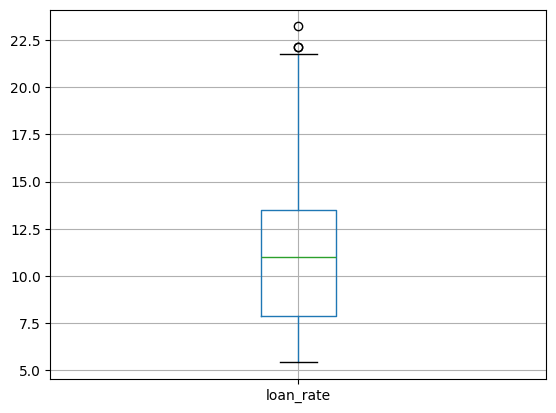

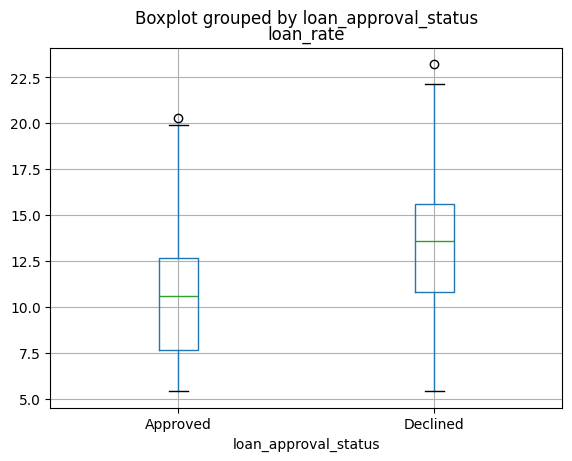

count   7047.00000
mean      10.39492
std        2.98781
min        5.42000
25%        7.66000
50%       10.59000
75%       12.69000
max       20.30000
Name: loan_rate, dtype: float64

count   2013.00000
mean      13.15056
std        3.29649
min        5.42000
25%       10.83000
50%       13.57000
75%       15.62000
max       23.22000
Name: loan_rate, dtype: float64


In [107]:
show_numeric_details(data_credit, 'loan_rate', 'loan_approval_status')

### loan_amount

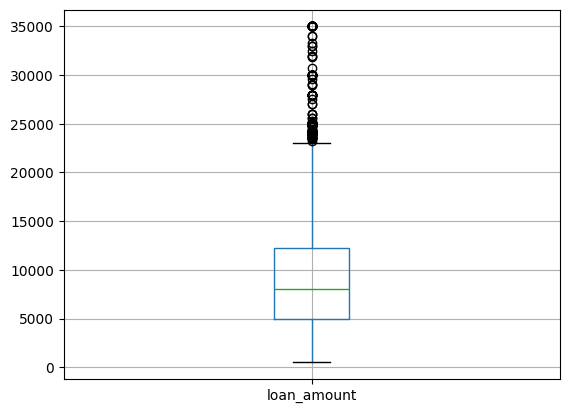

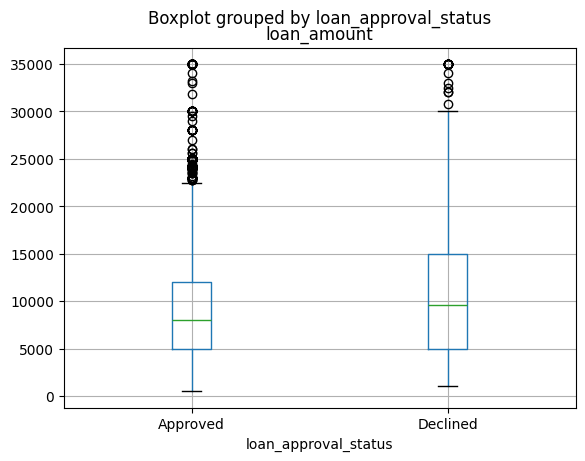

count    7818.00000
mean     9218.65886
std      6077.98429
min       500.00000
25%      5000.00000
50%      8000.00000
75%     12000.00000
max     35000.00000
Name: loan_amount, dtype: float64

count    2182.00000
mean    10819.84418
std      7104.74336
min      1000.00000
25%      5000.00000
50%      9600.00000
75%     15000.00000
max     35000.00000
Name: loan_amount, dtype: float64


In [108]:
show_numeric_details(data_credit, 'loan_amount', 'loan_approval_status')

### job_tenure_years

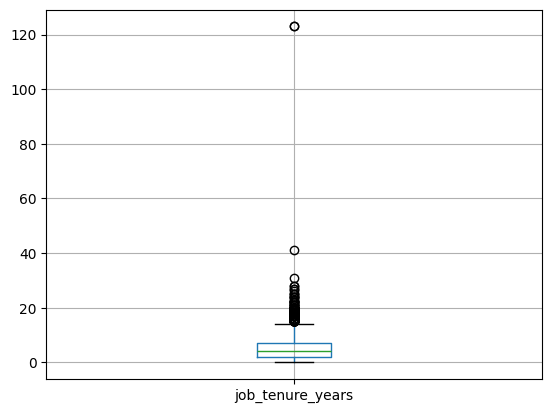

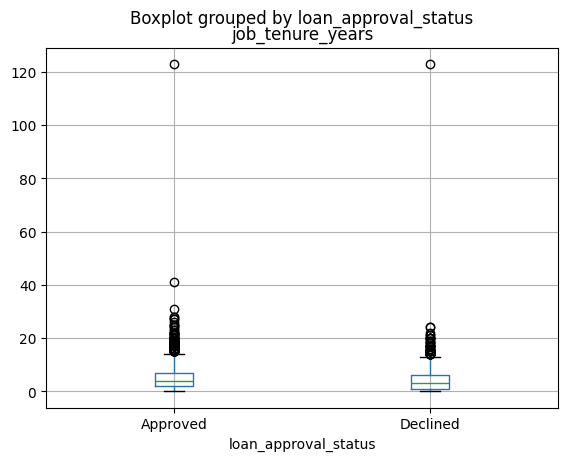

count   7643.00000
mean       4.96036
std        4.26361
min        0.00000
25%        2.00000
50%        4.00000
75%        7.00000
max      123.00000
Name: job_tenure_years, dtype: float64

count   2093.00000
mean       4.14811
std        4.61066
min        0.00000
25%        1.00000
50%        3.00000
75%        6.00000
max      123.00000
Name: job_tenure_years, dtype: float64


In [109]:
show_numeric_details(data_credit, 'job_tenure_years', 'loan_approval_status')

### credit_history_length_years

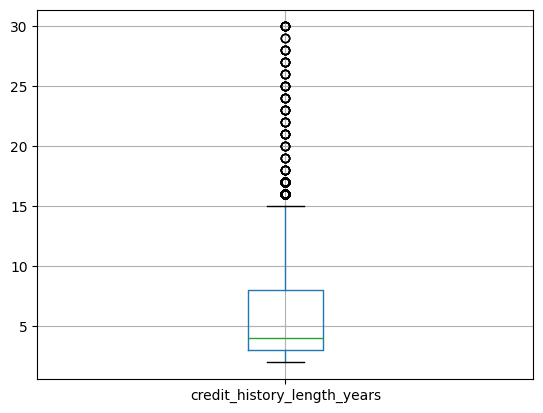

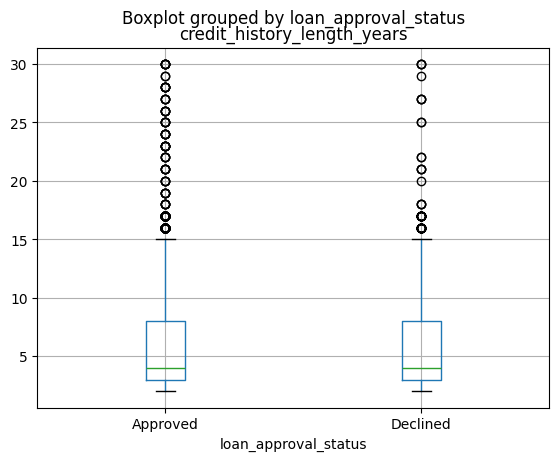

count   7818.00000
mean       5.86915
std        4.06738
min        2.00000
25%        3.00000
50%        4.00000
75%        8.00000
max       30.00000
Name: credit_history_length_years, dtype: float64

count   2182.00000
mean       5.60312
std        3.98210
min        2.00000
25%        3.00000
50%        4.00000
75%        8.00000
max       30.00000
Name: credit_history_length_years, dtype: float64


In [110]:
show_numeric_details(data_credit, 'credit_history_length_years', 'loan_approval_status')

### applicant_age

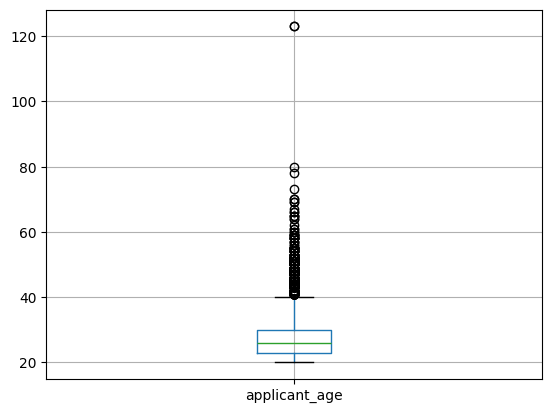

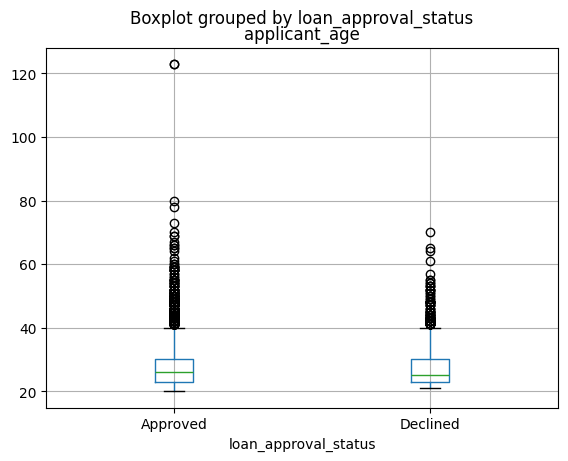

count   7818.00000
mean      27.84497
std        6.42734
min       20.00000
25%       23.00000
50%       26.00000
75%       30.00000
max      123.00000
Name: applicant_age, dtype: float64

count   2182.00000
mean      27.38726
std        6.10138
min       21.00000
25%       23.00000
50%       25.00000
75%       30.00000
max       70.00000
Name: applicant_age, dtype: float64


In [111]:
show_numeric_details(data_credit, 'applicant_age', 'loan_approval_status')

### applicant_income

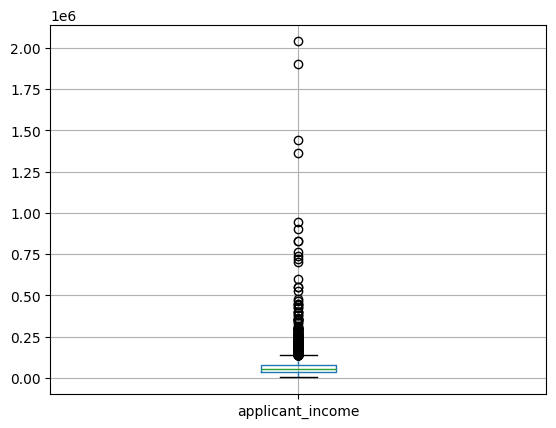

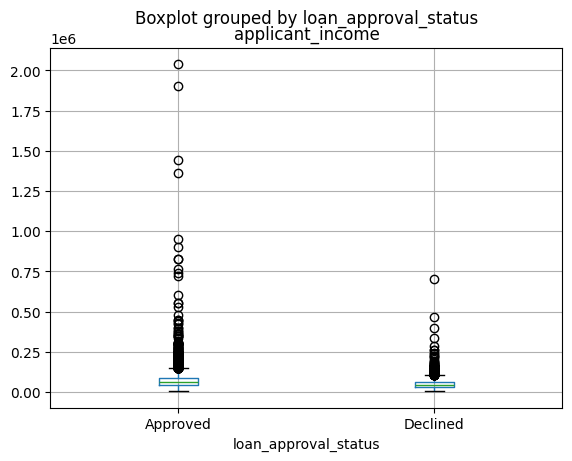

count      7818.00000
mean      70488.17997
std       60750.57851
min        7904.00000
25%       42000.00000
50%       60000.00000
75%       84000.00000
max     2039784.00000
Name: applicant_income, dtype: float64

count     2182.00000
mean     48700.97250
std      35599.00843
min       4200.00000
25%      29479.00000
50%      42000.00000
75%      60000.00000
max     703800.00000
Name: applicant_income, dtype: float64


In [112]:
show_numeric_details(data_credit, 'applicant_income', 'loan_approval_status')

### loan_income_ratio

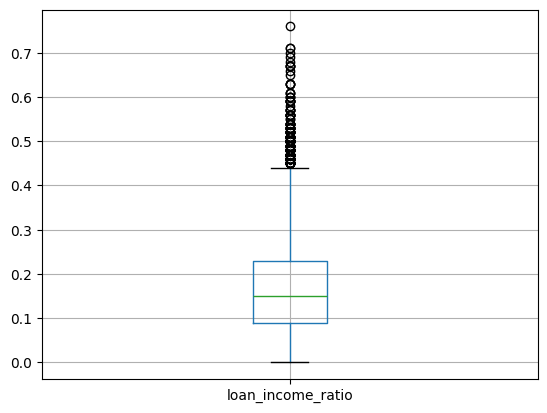

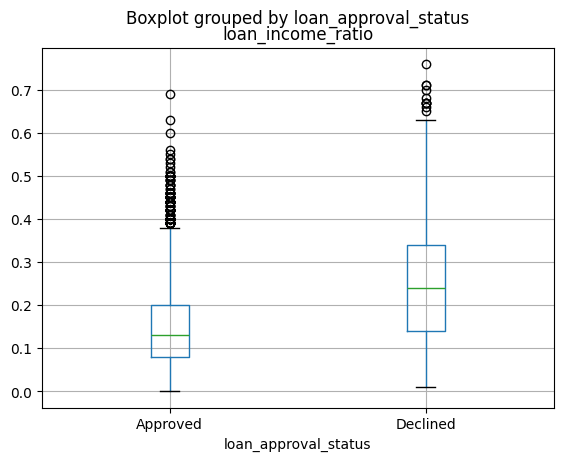

count   7818.00000
mean       0.14847
std        0.08661
min        0.00000
25%        0.08000
50%        0.13000
75%        0.20000
max        0.69000
Name: loan_income_ratio, dtype: float64

count   2182.00000
mean       0.24773
std        0.13310
min        0.01000
25%        0.14000
50%        0.24000
75%        0.34000
max        0.76000
Name: loan_income_ratio, dtype: float64


In [113]:
show_numeric_details(data_credit, 'loan_income_ratio', 'loan_approval_status')

### credit_history_length_months

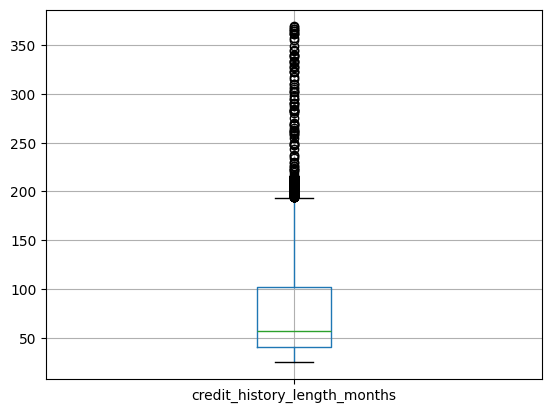

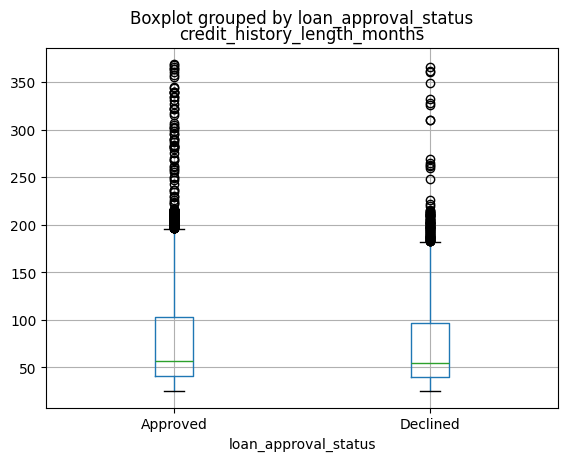

count   7818.00000
mean      76.48874
std       48.88821
min       25.00000
25%       41.00000
50%       57.00000
75%      103.00000
max      369.00000
Name: credit_history_length_months, dtype: float64

count   2182.00000
mean      73.15215
std       47.83445
min       25.00000
25%       40.00000
50%       55.00000
75%       97.00000
max      366.00000
Name: credit_history_length_months, dtype: float64


In [114]:
show_numeric_details(data_credit, 'credit_history_length_months', 'loan_approval_status')

## Atribute discrete si ordinale

In [115]:
credit_described_category = data_credit.describe(include=['O'])
credit_described_category

,residential_status,loan_purpose,loan_approval_status,loan_rating,credit_history_default_status,stability_rating
count,10000,10000,10000,10000,10000,10000
unique,4,6,2,7,2,4
top,Renter,Study,Approved,Excellent,No,C
freq,5056,1971,7818,3325,8264,5056


### residential_status

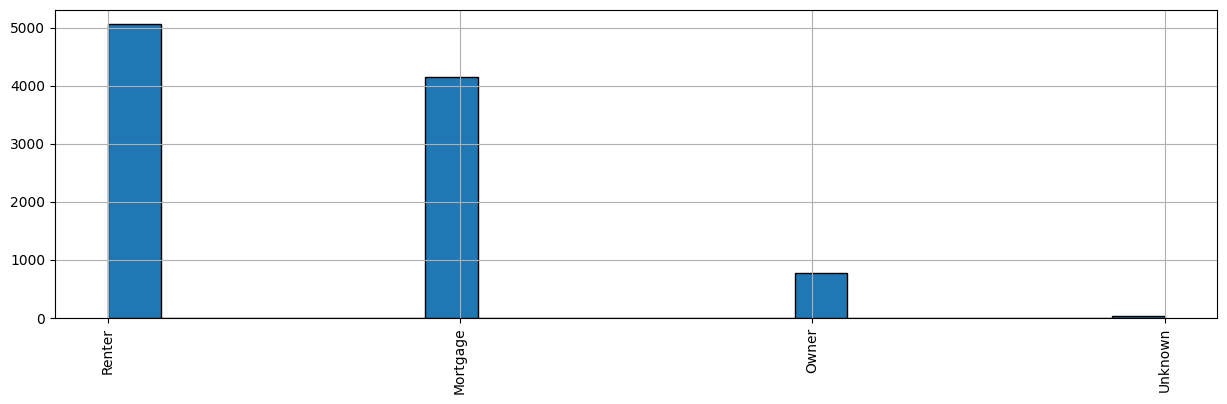

['Renter' 'Mortgage' 'Owner' 'Unknown']
residential_status
Renter      5056
Mortgage    4140
Owner        775
Unknown       29
Name: count, dtype: int64


In [116]:
show_discrete_and_ordinal(data_credit, 'residential_status', 'loan_approval_status')

### loan_purpose

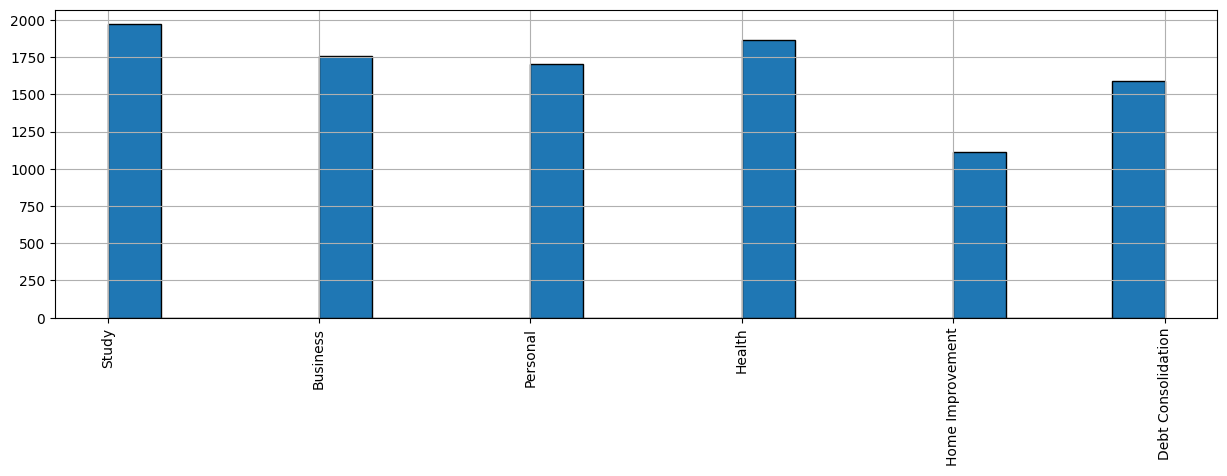

['Study' 'Business' 'Personal' 'Health' 'Home Improvement'
 'Debt Consolidation']
loan_purpose
Study                 1971
Health                1865
Business              1755
Personal              1705
Debt Consolidation    1590
Home Improvement      1114
Name: count, dtype: int64


In [117]:
show_discrete_and_ordinal(data_credit, 'loan_purpose', 'loan_approval_status')

### loan_rating

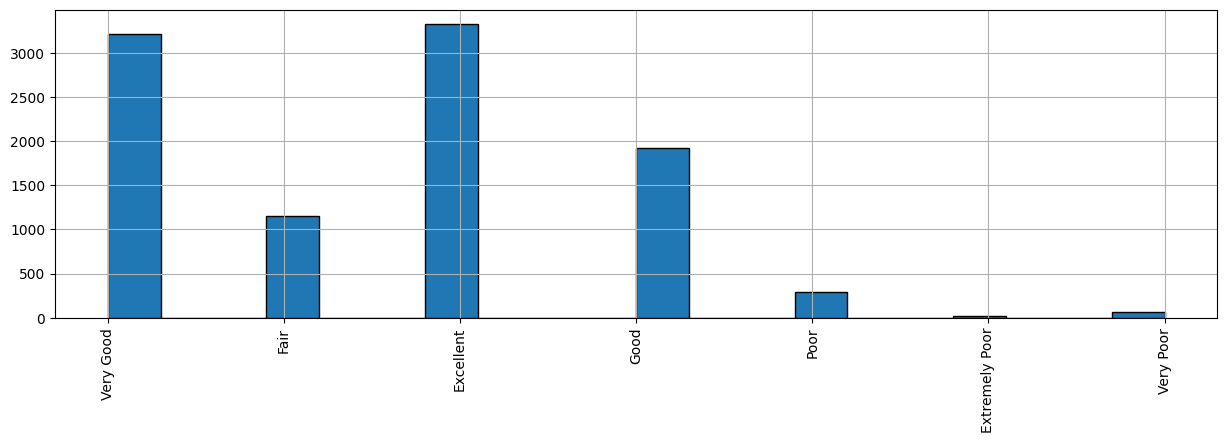

['Very Good' 'Fair' 'Excellent' 'Good' 'Poor' 'Extremely Poor' 'Very Poor']
loan_rating
Excellent         3325
Very Good         3216
Good              1925
Fair              1151
Poor               296
Very Poor           63
Extremely Poor      24
Name: count, dtype: int64


In [118]:
show_discrete_and_ordinal(data_credit, 'loan_rating', 'loan_approval_status')

### credit_history_default_status

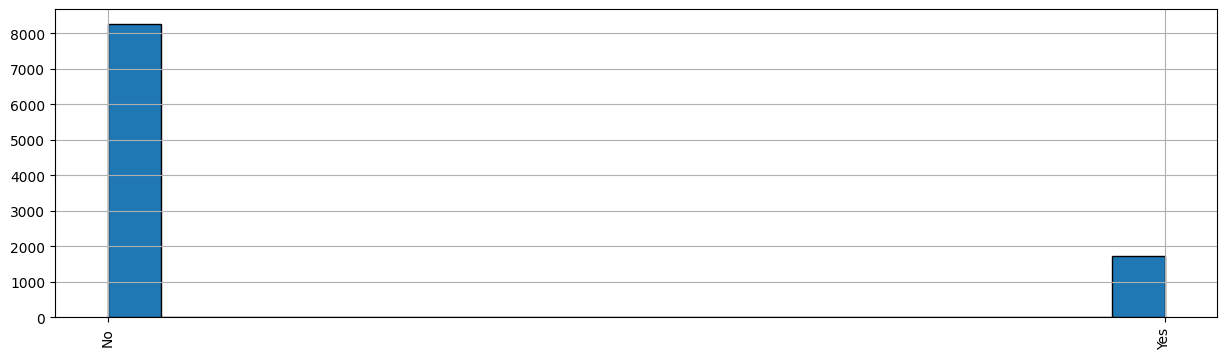

['No' 'Yes']
credit_history_default_status
No     8264
Yes    1736
Name: count, dtype: int64


In [119]:
show_discrete_and_ordinal(data_credit, 'credit_history_default_status', 'loan_approval_status')

### stability_rating

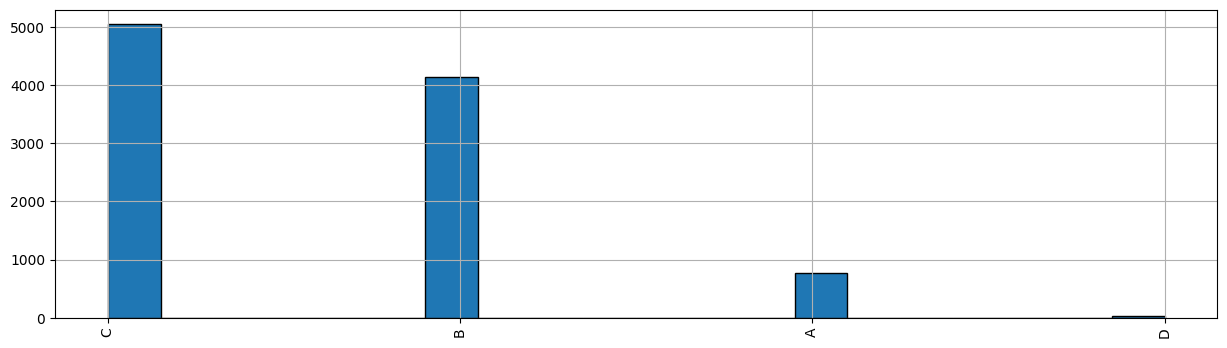

['C' 'B' 'A' 'D']
stability_rating
C    5056
B    4140
A     775
D      29
Name: count, dtype: int64


In [120]:
show_discrete_and_ordinal(data_credit, 'stability_rating', 'loan_approval_status')

## Analiza echilibrului de date

In [121]:
def show_equilibrium_graph_credit(column_name):
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    g1 = sns.countplot(x=column_name, hue='loan_approval_status', data=data_credit_train, ax=ax[0], order=data_credit_train.sort_values(column_name, ascending=False)[column_name])
    g2 = sns.countplot(x=column_name, hue='loan_approval_status', data=data_credit_test, ax=ax[1], order=data_credit_test.sort_values(column_name, ascending=False)[column_name])
    g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
    g2.set_xticklabels(g2.get_xticklabels(), rotation=80)
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\3944423738.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\3944423738.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


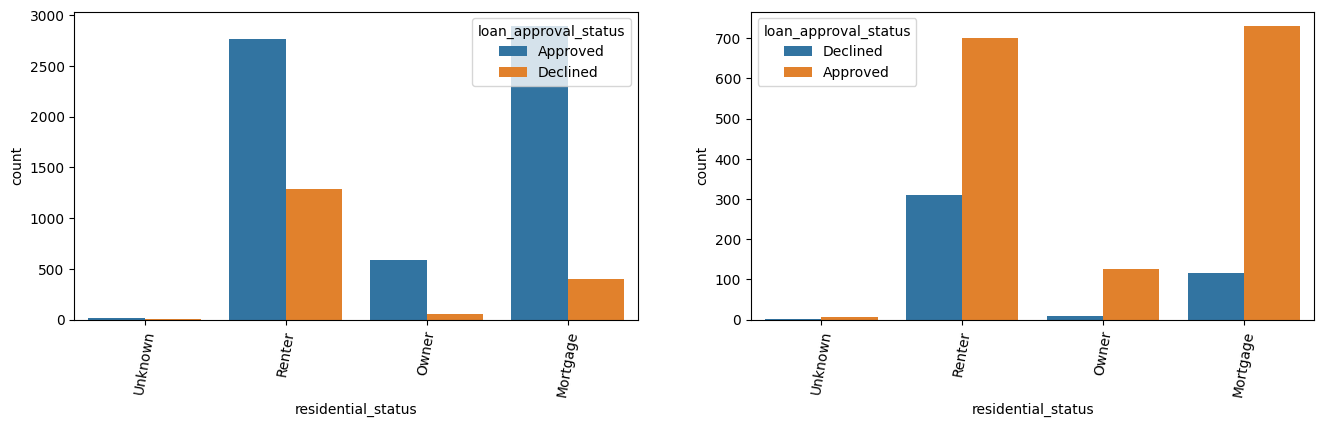

C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\3944423738.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\3944423738.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


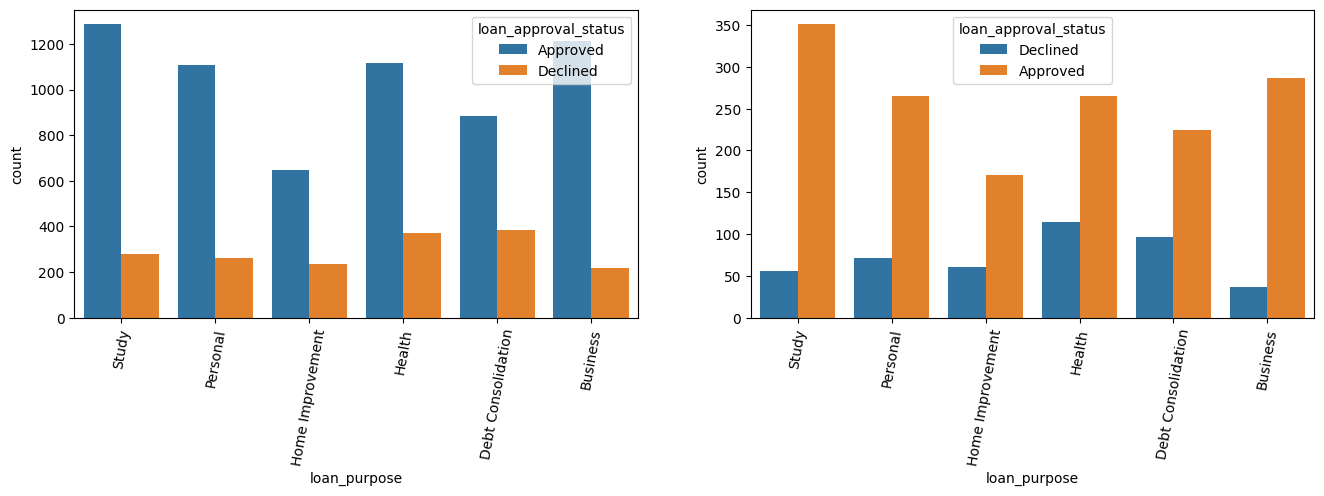

C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\3944423738.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\3944423738.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


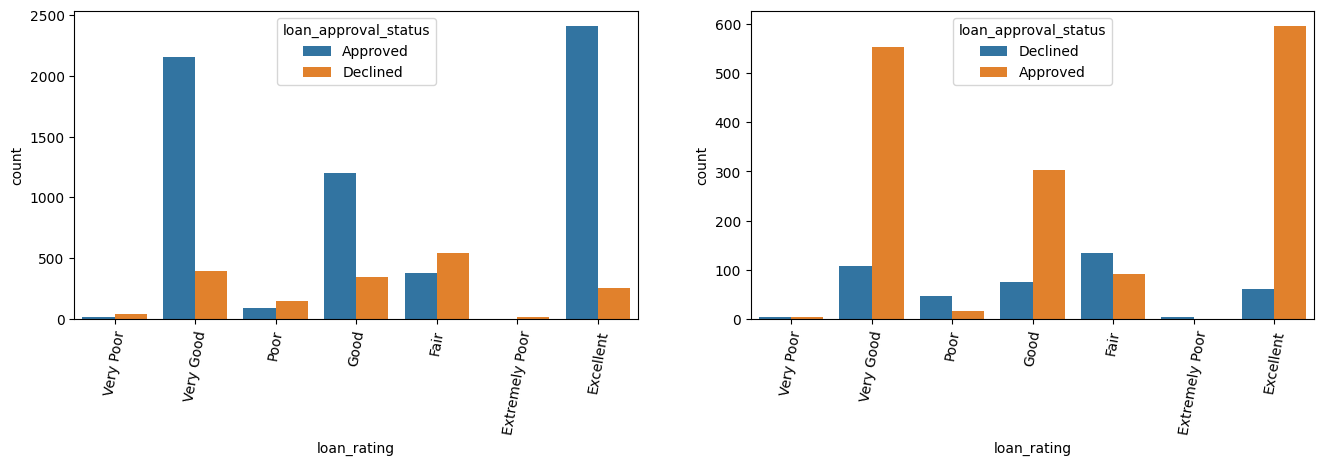

C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\3944423738.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\3944423738.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


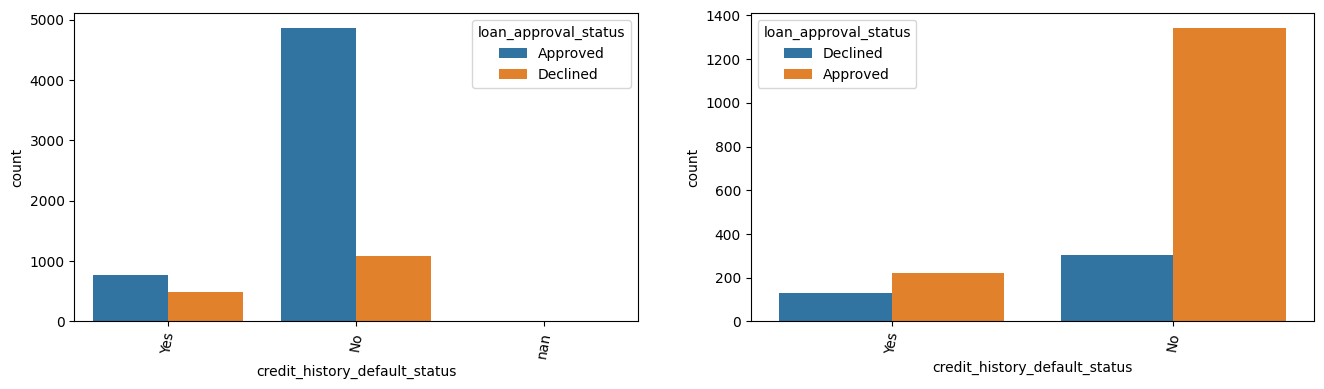

C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\3944423738.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14688\3944423738.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=80)


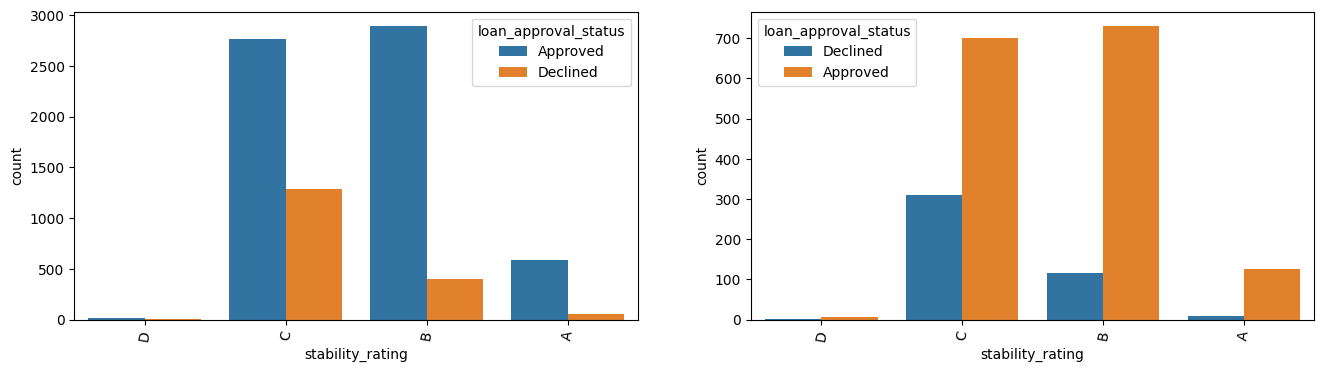

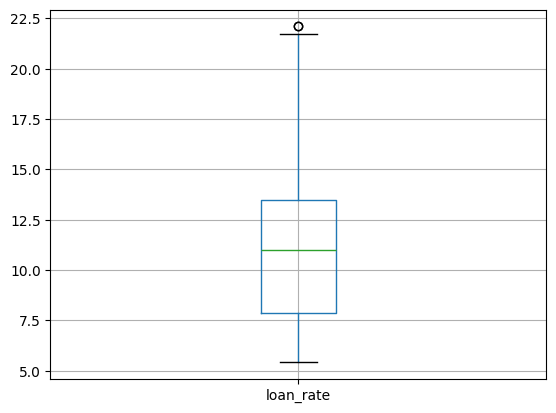

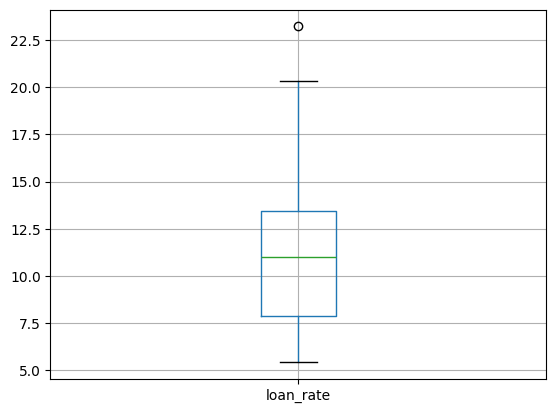

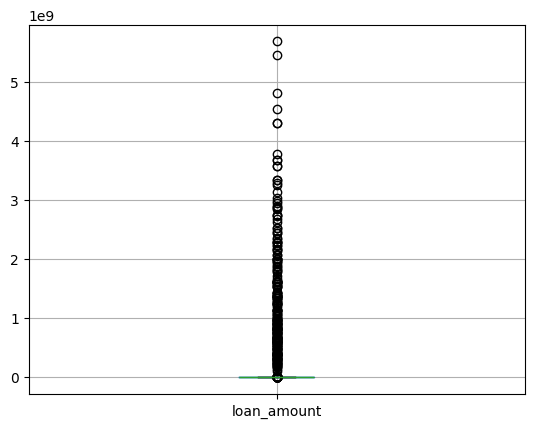

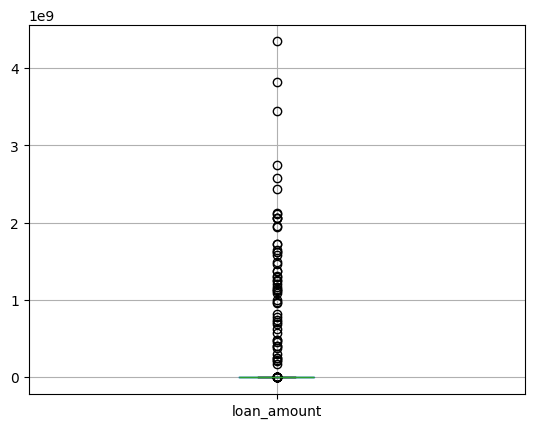

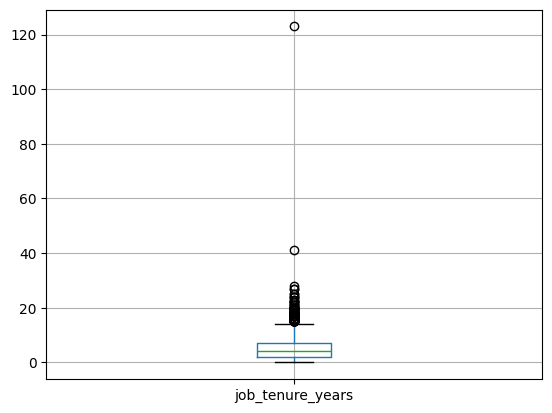

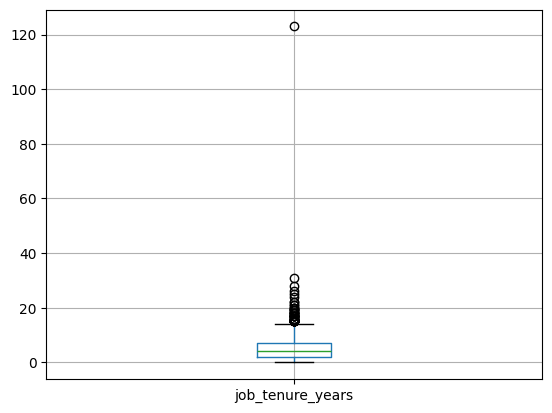

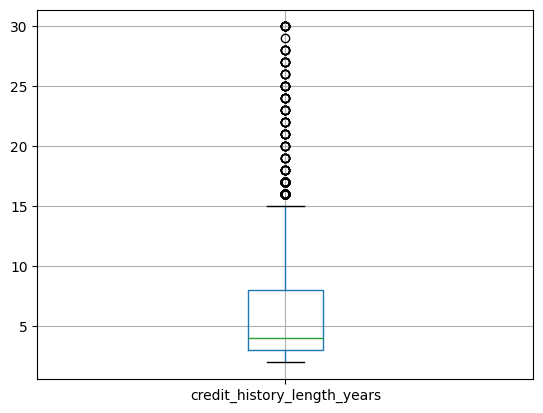

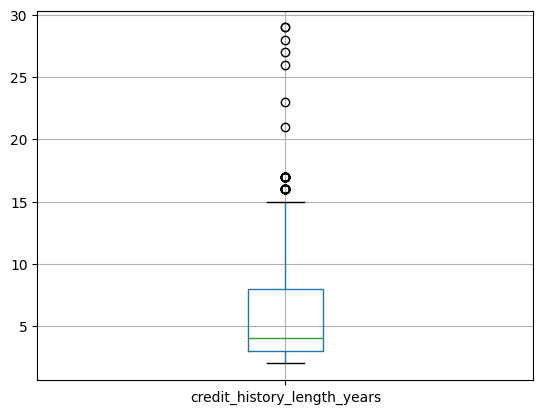

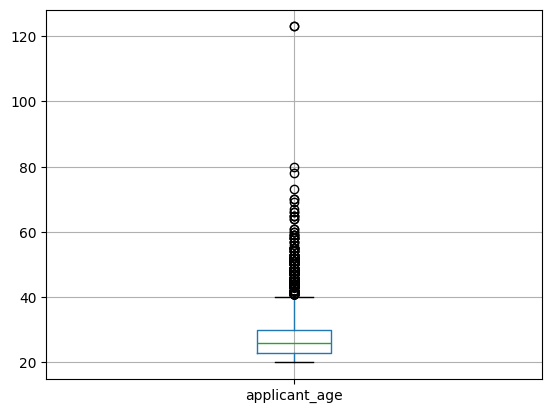

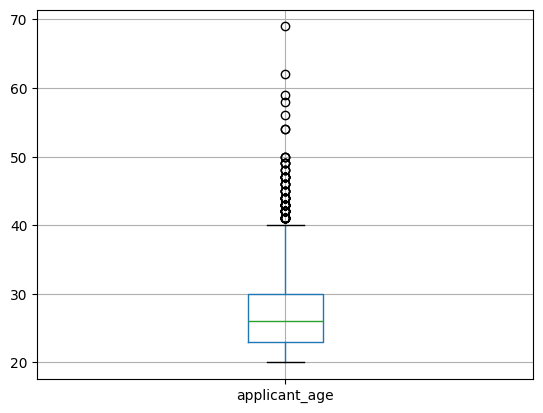

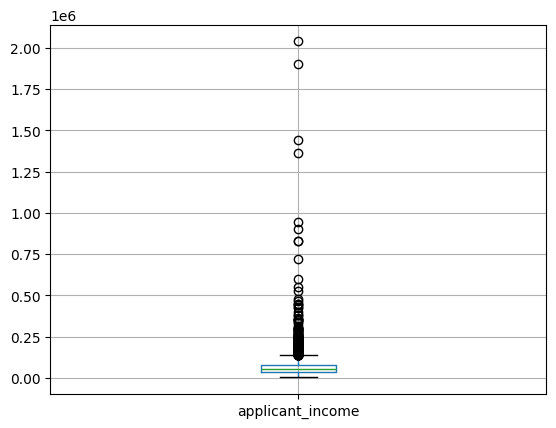

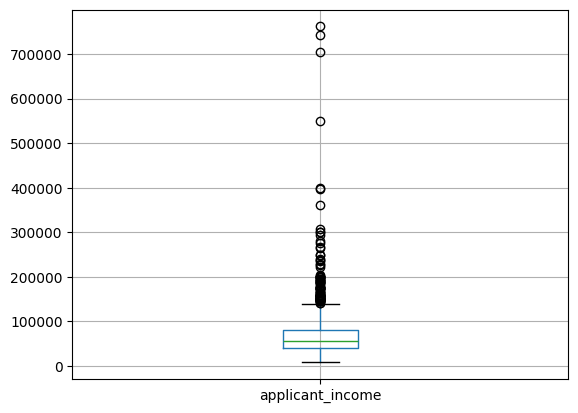

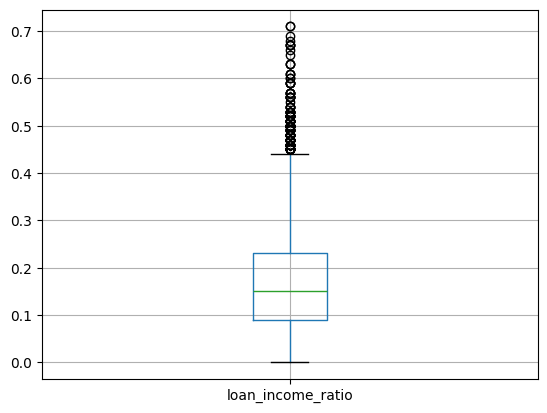

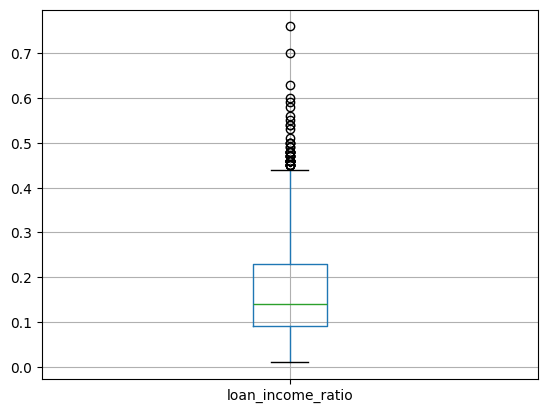

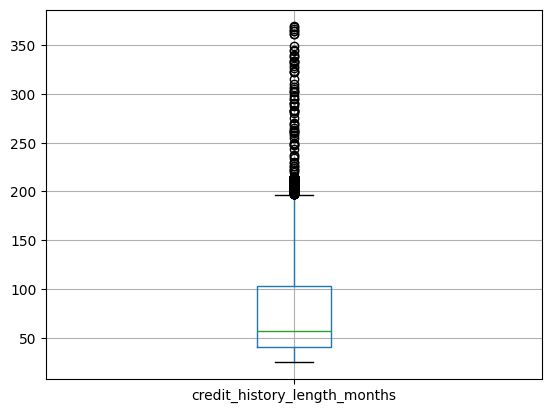

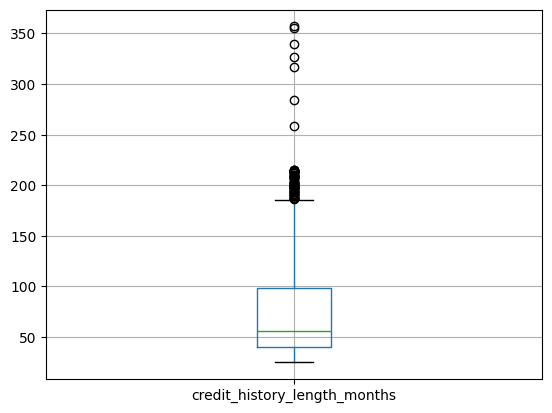

In [122]:
data_credit_categorical_only = data_credit.select_dtypes(exclude=np.number)
data_credit_categorical_only = data_credit_categorical_only[data_credit_categorical_only.columns[~data_credit_categorical_only.columns.isin(['loan_approval_status'])]]
for col in data_credit_categorical_only.columns:
    show_equilibrium_graph_credit(col)

data_credit_numerics_only = data_credit.select_dtypes(include=np.number)
for col in data_credit_numerics_only:
    b1 = data_credit_train.boxplot(column=[col])
    plt.show()

    b2 = data_credit_test.boxplot(column=col)
    plt.show()
    # fig, ax = plt.subplots(1,2, figsize=(16,4))
    # fig.suptitle(col)
    # ax[0].boxplot(x=col, data=data_salary_train)#data_salary_train.boxplot(column=col)
    # ax[1].boxplot(x=col, data=data_salary_test)
    # plt.show()

## Correlations

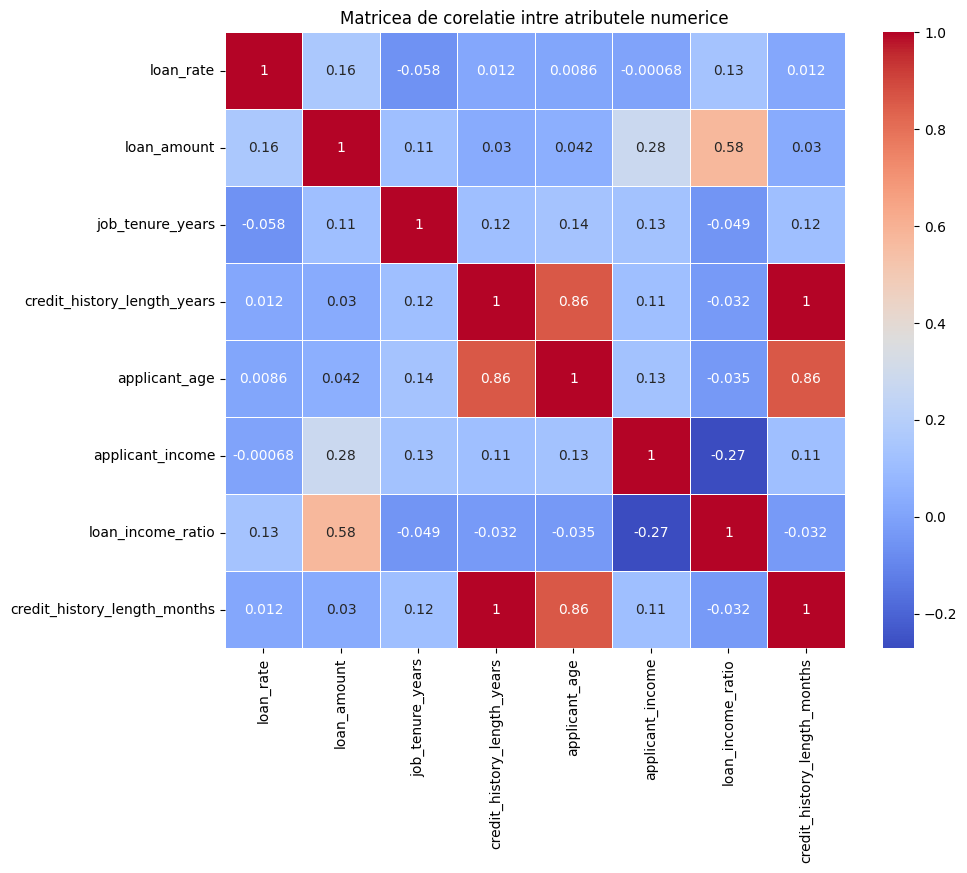

                              loan_rate  loan_amount  job_tenure_years  credit_history_length_years  applicant_age  applicant_income  loan_income_ratio  credit_history_length_months
loan_rate                       1.00000      0.16055          -0.05794                      0.01215        0.00863          -0.00068            0.13240                       0.01185
loan_amount                     0.16055      1.00000           0.11294                      0.03021        0.04213           0.27960            0.57772                       0.03009
job_tenure_years               -0.05794      0.11294           1.00000                      0.11538        0.13532           0.12675           -0.04949                       0.11549
credit_history_length_years     0.01215      0.03021           0.11538                      1.00000        0.85826           0.11397           -0.03235                       0.99792
applicant_age                   0.00863      0.04213           0.13532                    

In [123]:
data_credit_numerics_only = data_credit.select_dtypes(include=np.number)
correlations = data_credit_numerics_only.corr()
cols = data_credit_numerics_only.columns.tolist()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matricea de corelatie intre atributele numerice')
plt.show()
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
# ticks = np.arange(0,len(cols),1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(cols, rotation=90)
# ax.set_yticklabels(cols)
# plt.show()
    # corr_matrix = data.select_dtypes(include=np.number).corr()
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    # plt.title('Matricea de corelatie intre atributele numerice')
    # plt.show()

print(correlations)

In [124]:
data_credit_categorical_only = data_credit.select_dtypes(exclude=np.number)
data_credit_categorical_only = data_credit_categorical_only[data_credit_categorical_only.columns[~data_credit_categorical_only.columns.isin(['money'])]]
def is_correlated(x, y):
    CrosstabResult = pd.crosstab(index=data_credit[x], columns=data_credit[y])
    ChiSqResult = chi2_contingency(CrosstabResult)
    p, x = ChiSqResult[1], "correlated" if ChiSqResult[1] < 0.05 else "not-correlated"
    return p, x

chi2 = []
for col1 in data_credit_categorical_only:
    for col2 in data_credit_categorical_only:
        chi2.append(is_correlated(col1, col2)[1])

chi2 = np.reshape(chi2, (int(math.sqrt(len(chi2))), int(math.sqrt(len(chi2)))))
df = pd.DataFrame(data=chi2, index=data_credit_categorical_only.columns, columns=data_credit_categorical_only.columns)
print(df)

                              residential_status    loan_purpose loan_approval_status     loan_rating credit_history_default_status stability_rating
residential_status                    correlated      correlated           correlated      correlated                    correlated       correlated
loan_purpose                          correlated      correlated           correlated  not-correlated                not-correlated       correlated
loan_approval_status                  correlated      correlated           correlated      correlated                    correlated       correlated
loan_rating                           correlated  not-correlated           correlated      correlated                    correlated       correlated
credit_history_default_status         correlated  not-correlated           correlated      correlated                    correlated       correlated
stability_rating                      correlated      correlated           correlated      correlated     

# Preprocesarea datelor

## Salary

### Outliers (full)

In [125]:
def get_outliers_salary(col_name):
    Q1 = data_salary[col_name].quantile(0.25)
    Q3 = data_salary[col_name].quantile(0.75)
    IQR = Q3 - Q1

    threshold = 1.5
    outliers = data_salary[(data_salary[col_name] < Q1 - threshold * IQR) | (data_salary[col_name] > Q3 + threshold * IQR)]
    print(outliers)
    return outliers

In [126]:
for col in data_salary.select_dtypes(include=np.number).columns:
    print(col)
    print(get_outliers_salary(col))
    print('--------------------------------------------------------')

fnl
         fnl      hpw relation   gain        country                job  edu_int  years  loss   work_type partner  edu gender   race   prod gtype  money
5     444089 40.00000     NotF      0  United-States              Sales        7     56     0        Priv       D   11      F  White     62    DC  <=50K
55    477867 40.00000        H      0  United-States    Exec-managerial       13     55     0  SelfNotInc     MCS    B      M  White     17    AC   >50K
105   423024 20.00000     OwnC      0  United-States  Handlers-cleaners        8     18     0        Priv      NM   12      M  White     42    AC  <=50K
162   460408      NaN        H      0  United-States       Craft-repair        9     30     0        Priv     MCS  HSG      M  White     82    AC   >50K
166   506830 40.00000     NotM      0  United-States       Tech-support       10     38     0        FGov       D   SC      F  Black     67    DC  <=50K
...      ...      ...      ...    ...            ...                ...      .

### Imputing for missing values

In [127]:
cols_numerical = data_salary_train.select_dtypes(include=np.number).columns
print(data_salary_train.describe())
imputer_salary = IterativeImputer(random_state=0)
imputed_data_salary_train_tf = imputer_salary.fit_transform(data_salary_train[cols_numerical])
imputed_data_salary_train = pd.DataFrame(imputed_data_salary_train_tf, columns=cols_numerical)
print(imputed_data_salary_train.describe())

cols_categorical = data_salary_train.select_dtypes(exclude=np.number).columns
imputer_salary_categorical = SimpleImputer(strategy='most_frequent')
imputed_data_salary_train_cat_tf = imputer_salary_categorical.fit_transform(data_salary_train[cols_categorical])
imputed_data_salary_train_cat = pd.DataFrame(imputed_data_salary_train_cat_tf, columns=cols_categorical)
print(imputed_data_salary_train_cat.describe(include='all'))

                fnl        hpw        gain    edu_int      years       loss         prod
count    7999.00000 7199.00000  7999.00000 7999.00000 7999.00000 7999.00000   7999.00000
mean   190456.54544   40.30740  1005.27266   13.97525   38.72247   77.48544   2065.81010
std    106418.46973   12.51920  7164.77857   23.86718   13.70862  378.35275  14329.48449
min     19214.00000    1.00000     0.00000    1.00000   17.00000    0.00000    -28.00000
25%    118221.00000   40.00000     0.00000    9.00000   28.00000    0.00000     42.00000
50%    178353.00000   40.00000     0.00000   10.00000   37.00000    0.00000     57.00000
75%    238030.50000   45.00000     0.00000   13.00000   48.00000    0.00000     77.00000
max   1455435.00000   99.00000 99999.00000  205.00000   90.00000 3770.00000 200110.00000
                fnl        hpw        gain    edu_int      years       loss         prod
count    7999.00000 7999.00000  7999.00000 7999.00000 7999.00000 7999.00000   7999.00000
mean   190456.54544  

### Imputating for outliers

In [128]:
for col in data_salary_train.select_dtypes(include=np.number).columns:
    Q1 = imputed_data_salary_train[col].quantile(0.25)
    Q3 = imputed_data_salary_train[col].quantile(0.75)
    IQR = Q3 - Q1

    threshold = 1.5
    outliers = imputed_data_salary_train[(imputed_data_salary_train[col] < Q1 - threshold * IQR) | (imputed_data_salary_train[col] > Q3 + threshold * IQR)]
    for index, row in outliers.iterrows():
        imputed_data_salary_train.at[index, col] = np.nan

print(imputed_data_salary_train.describe())
cols_numerical = data_salary_train.select_dtypes(include=np.number).columns
imputer_salary = IterativeImputer(random_state=0)
imputed_data_salary_train_tf = imputer_salary.fit_transform(imputed_data_salary_train[cols_numerical])
imputed_data_salary_train = pd.DataFrame(imputed_data_salary_train_tf, columns=cols_numerical)
print(imputed_data_salary_train.describe())

               fnl        hpw       gain    edu_int      years       loss       prod
count   7763.00000 6032.00000 7385.00000 7724.00000 7963.00000 7666.00000 7360.00000
mean  180384.68028   41.36818    0.00000   10.12403   38.51953    0.00000   55.28872
std    87802.60679    3.89841    0.00000    2.50353   13.39923    0.00000   24.50189
min    19214.00000   32.00000    0.00000    3.00000   17.00000    0.00000   -8.00000
25%   117040.50000   40.00000    0.00000    9.00000   28.00000    0.00000   37.00000
50%   175696.00000   40.00000    0.00000   10.00000   37.00000    0.00000   57.00000
75%   230011.00000   40.92493    0.00000   12.00000   48.00000    0.00000   72.00000
max   417668.00000   52.00000    0.00000   16.00000   78.00000    0.00000  127.00000
               fnl        hpw       gain    edu_int      years       loss       prod
count   7999.00000 7999.00000 7999.00000 7999.00000 7999.00000 7999.00000 7999.00000
mean  180423.84889   41.35883    0.00000   10.12404   38.51922   

### Removing correlated attributes

In [129]:
imputed_data_salary_train = imputed_data_salary_train[imputed_data_salary_train.columns[~imputed_data_salary_train.columns.isin(['prod'])]]
print(imputed_data_salary_train.describe())

               fnl        hpw       gain    edu_int      years       loss
count   7999.00000 7999.00000 7999.00000 7999.00000 7999.00000 7999.00000
mean  180423.84889   41.35883    0.00000   10.12404   38.51922    0.00000
std    86502.27072    3.39885    0.00000    2.46095   13.36929    0.00000
min    19214.00000   32.00000    0.00000    3.00000   17.00000    0.00000
25%   118221.00000   40.00000    0.00000    9.00000   28.00000    0.00000
50%   177121.00000   40.00000    0.00000   10.00000   37.00000    0.00000
75%   226929.50000   41.65459    0.00000   12.00000   47.00000    0.00000
max   417668.00000   52.00000    0.00000   16.00000   78.00000    0.00000


### Label Encoding on categorical values

In [130]:
imputed_data_salary_train_cat

for col in imputed_data_salary_train_cat.columns:
    l = preprocessing.LabelEncoder()
    imputed_data_salary_train_cat[col] = l.fit_transform(imputed_data_salary_train_cat[col])

print(imputed_data_salary_train_cat)

X = pd.concat([imputed_data_salary_train, imputed_data_salary_train_cat], axis=1)
print(X)

      relation  country  job  work_type  partner  edu  gender  race  gtype  money
0            2       37    1          4        0   15       1     4      1      0
1            1       37    2          2        4   11       1     4      0      0
2            0       37   11          6        2    9       1     4      0      1
3            0       37    3          6        2   15       1     4      0      1
4            1       37    6          4        4   11       1     4      0      0
...        ...      ...  ...        ...      ...  ...     ...   ...    ...    ...
7994         0       37   10          2        2    8       1     4      0      1
7995         4       37   11          4        0    8       1     4      0      0
7996         0       37    1          1        2   11       1     4      0      1
7997         0       37   13          4        2   11       1     4      0      0
7998         0       37   10          5        2    9       1     4      0      1

[7999 rows x 10

### Scaling the data

In [131]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled)

X_salary_train = X_scaled[X_scaled.columns[~X_scaled.columns.isin(['money'])]]
print(X_salary_train)

y_salary_train = X_scaled['money']
print(y_salary_train)

         fnl     hpw    gain  edu_int   years    loss  relation  country     job  work_type  partner     edu  gender    race   gtype   money
0    0.61591 0.40000 0.00000  0.53846 0.34426 0.00000   0.40000  0.94872 0.07692    0.50000  0.00000 1.00000 1.00000 1.00000 1.00000 0.00000
1    0.33167 0.40000 0.00000  0.46154 0.73770 0.00000   0.20000  0.94872 0.15385    0.25000  0.66667 0.73333 1.00000 1.00000 0.00000 0.00000
2    0.42515 0.49748 0.00000  0.76923 0.40984 0.00000   0.00000  0.94872 0.84615    0.75000  0.33333 0.60000 1.00000 1.00000 0.00000 1.00000
3    0.33097 0.46705 0.00000  0.53846 0.39344 0.00000   0.00000  0.94872 0.23077    0.75000  0.33333 1.00000 1.00000 1.00000 0.00000 1.00000
4    0.39756 0.40000 0.00000  0.46154 0.13115 0.00000   0.20000  0.94872 0.46154    0.50000  0.66667 0.73333 1.00000 1.00000 0.00000 0.00000
...      ...     ...     ...      ...     ...     ...       ...      ...     ...        ...      ...     ...     ...     ...     ...     ...
7994 0.70874 

### Preprocessing test set

In [132]:
# -------------------- Removing missing values 
cols_numerical = data_salary_test.select_dtypes(include=np.number).columns
print(data_salary_test.describe())
imputer_salary3 = IterativeImputer(random_state=0)
imputed_data_salary_test_tf = imputer_salary3.fit_transform(data_salary_test[cols_numerical])
imputed_data_salary_test = pd.DataFrame(imputed_data_salary_test_tf, columns=cols_numerical)
print(imputed_data_salary_test.describe())

cols_categorical = data_salary_test.select_dtypes(exclude=np.number).columns
imputer_salary_categorical4 = SimpleImputer(strategy='most_frequent')
imputed_data_salary_test_cat_tf = imputer_salary_categorical4.fit_transform(data_salary_test[cols_categorical])
imputed_data_salary_test_cat = pd.DataFrame(imputed_data_salary_test_cat_tf, columns=cols_categorical)
print(imputed_data_salary_test_cat.describe(include='all'))

# -------------------- Removing outliers
for col in data_salary_test.select_dtypes(include=np.number).columns:
    Q1 = imputed_data_salary_test[col].quantile(0.25)
    Q3 = imputed_data_salary_test[col].quantile(0.75)
    IQR = Q3 - Q1

    threshold = 1.5
    outliers = imputed_data_salary_test[(imputed_data_salary_test[col] < Q1 - threshold * IQR) | (imputed_data_salary_test[col] > Q3 + threshold * IQR)]
    for index, row in outliers.iterrows():
        imputed_data_salary_test.at[index, col] = np.nan

print(imputed_data_salary_test.describe())
cols_numerical = data_salary_train.select_dtypes(include=np.number).columns
imputer_salary5 = IterativeImputer(random_state=0)
imputed_data_salary_test_tf5 = imputer_salary5.fit_transform(imputed_data_salary_test[cols_numerical])
imputed_data_salary_test = pd.DataFrame(imputed_data_salary_test_tf5, columns=cols_numerical)
print(imputed_data_salary_test.describe())

# ------------------ Removing correlated values
imputed_data_salary_test = imputed_data_salary_test[imputed_data_salary_test.columns[~imputed_data_salary_test.columns.isin(['prod'])]]
print(imputed_data_salary_test.describe())

# ------------------- Label encoding categorical values
print(imputed_data_salary_test_cat)

for col in imputed_data_salary_test_cat.columns:
    l = preprocessing.LabelEncoder()
    imputed_data_salary_test_cat[col] = l.fit_transform(imputed_data_salary_test_cat[col])

print(imputed_data_salary_test_cat)

X2 = pd.concat([imputed_data_salary_test, imputed_data_salary_test_cat], axis=1)
print(X2)

# ---------------- Scaling test data
min_max_scaler2 = preprocessing.MinMaxScaler()
X_test_scaled = min_max_scaler2.fit_transform(X2)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X2.columns)
print(X_test_scaled)

X_salary_test = X_test_scaled[X_test_scaled.columns[~X_test_scaled.columns.isin(['money'])]]
print(X_salary_test)

y_salary_test = X_test_scaled['money']
print(y_salary_test)

                fnl        hpw        gain    edu_int      years       loss         prod
count    2000.00000 2000.00000  2000.00000 2000.00000 2000.00000 2000.00000   2000.00000
mean   189938.38050   40.80800   878.18900   15.40900   38.34450  110.61200   1811.42300
std    104694.39474   12.50601  6319.72085   28.07326   13.88939  450.47539  12639.84378
min     21626.00000    1.00000     0.00000    1.00000   17.00000    0.00000    -28.00000
25%    118366.25000   40.00000     0.00000    9.00000   27.00000    0.00000     40.75000
50%    179429.50000   40.00000     0.00000   10.00000   37.00000    0.00000     57.00000
75%    234543.75000   45.00000     0.00000   13.00000   47.25000    0.00000     77.00000
max   1033222.00000   99.00000 99999.00000  206.00000   90.00000 2824.00000 200125.00000
                fnl        hpw        gain    edu_int      years       loss         prod
count    2000.00000 2000.00000  2000.00000 2000.00000 2000.00000 2000.00000   2000.00000
mean   189938.38050  

## Credit

### Outliers (full)

In [133]:
def get_outliers_credit(col_name):
    Q1 = data_credit[col_name].quantile(0.25)
    Q3 = data_credit[col_name].quantile(0.75)
    IQR = Q3 - Q1

    threshold = 1.5
    outliers = data_credit[(data_credit[col_name] < Q1 - threshold * IQR) | (data_credit[col_name] > Q3 + threshold * IQR)]
    return outliers

In [134]:
for col in data_credit.select_dtypes(include=np.number).columns:
    print(col)
    print(get_outliers_credit(col))
    print('--------------------------------------------------------')

loan_rate
     residential_status  loan_rate  loan_amount        loan_purpose loan_approval_status  job_tenure_years  credit_history_length_years  applicant_age  applicant_income     loan_rating credit_history_default_status  loan_income_ratio stability_rating  credit_history_length_months
2156             Renter   23.22000        22250    Home Improvement             Declined           3.00000                           12             38             83000  Extremely Poor                           Yes            0.27000                C                           152
3680             Renter   22.11000        12500    Home Improvement             Declined           4.00000                            2             26             44000  Extremely Poor                           Yes            0.28000                C                            29
4123           Mortgage   22.11000        14400  Debt Consolidation             Declined          11.00000                            8            

### Imputating for missing values

In [135]:
cols_numerical = data_credit_train.select_dtypes(include=np.number).columns
print(data_credit_train.describe())
imputer_credit = IterativeImputer(random_state=0)
imputed_data_credit_train_tf = imputer_credit.fit_transform(data_credit_train[cols_numerical])
imputed_data_credit_train = pd.DataFrame(imputed_data_credit_train_tf, columns=cols_numerical)
print(imputed_data_credit_train.describe())

cols_categorical = data_credit_train.select_dtypes(exclude=np.number).columns
imputer_credit_categorical = SimpleImputer(strategy='most_frequent')
imputed_data_credit_train_cat_tf = imputer_credit_categorical.fit_transform(data_credit_train[cols_categorical])
imputed_data_credit_train_cat = pd.DataFrame(imputed_data_credit_train_cat_tf, columns=cols_categorical)
print(imputed_data_credit_train_cat.describe(include='all'))

       loan_rate      loan_amount  job_tenure_years  credit_history_length_years  applicant_age  applicant_income  loan_income_ratio  credit_history_length_months
count 7257.00000       8000.00000        7786.00000                   8000.00000     8000.00000        8000.00000         8000.00000                    7200.00000
mean    11.01108   38878187.44228           4.72900                      5.85750       27.78912       65662.13137            0.17044                      76.44986
std      3.27405  284508702.22200           4.20353                      4.09650        6.46420       58835.53075            0.10691                      49.43491
min      5.42000        500.00000           0.00000                      2.00000       20.00000        4200.00000            0.00000                      25.00000
25%      7.88000       5000.00000           2.00000                      3.00000       23.00000       38400.00000            0.09000                      41.00000
50%     10.99000      

       loan_rate      loan_amount  job_tenure_years  credit_history_length_years  applicant_age  applicant_income  loan_income_ratio  credit_history_length_months
count 8000.00000       8000.00000        8000.00000                   8000.00000     8000.00000        8000.00000         8000.00000                    8000.00000
mean    11.01464   38878187.44228           4.72354                      5.85750       27.78912       65662.13137            0.17044                      76.31340
std      3.12169  284508702.22200           4.14789                      4.09650        6.46420       58835.53075            0.10691                      49.22579
min      5.42000        500.00000           0.00000                      2.00000       20.00000        4200.00000            0.00000                      25.00000
25%      8.07000       5000.00000           2.00000                      3.00000       23.00000       38400.00000            0.09000                      41.00000
50%     10.99000      

### Imputating for outliers

In [136]:
for col in data_credit_train.select_dtypes(include=np.number).columns:
    Q1 = imputed_data_credit_train[col].quantile(0.25)
    Q3 = imputed_data_credit_train[col].quantile(0.75)
    IQR = Q3 - Q1

    threshold = 1.5
    outliers = imputed_data_credit_train[(imputed_data_credit_train[col] < Q1 - threshold * IQR) | (imputed_data_credit_train[col] > Q3 + threshold * IQR)]
    for index, row in outliers.iterrows():
        imputed_data_credit_train.at[index, col] = np.nan

print(imputed_data_credit_train.describe())
cols_numerical = data_credit_train.select_dtypes(include=np.number).columns
imputer_credit = IterativeImputer(random_state=0)
imputed_data_credit_train_tf = imputer_credit.fit_transform(imputed_data_credit_train[cols_numerical])
imputed_data_credit_train = pd.DataFrame(imputed_data_credit_train_tf, columns=cols_numerical)
print(imputed_data_credit_train.describe())

       loan_rate  loan_amount  job_tenure_years  credit_history_length_years  applicant_age  applicant_income  loan_income_ratio  credit_history_length_months
count 7988.00000   7673.00000        7810.00000                   7710.00000     7613.00000        7615.00000         7851.00000                    7719.00000
mean    10.99901   9316.84804           4.40081                      5.38820       26.81059       58060.63900            0.16385                      70.82653
std      3.09779   5882.11710           3.40406                      3.28720        4.53507       26989.04060            0.09612                      39.73830
min      5.42000    500.00000           0.00000                      2.00000       20.00000        4200.00000            0.00000                      25.00000
25%      8.00000   5000.00000           2.00000                      3.00000       23.00000       37500.00000            0.09000                      41.00000
50%     10.99000   8000.00000           4.0000

### Removing correlated attirbutes

In [137]:
imputed_data_credit_train = imputed_data_credit_train[imputed_data_credit_train.columns[~imputed_data_credit_train.columns.isin(['credit_history_length_years'])]]
print(imputed_data_credit_train.describe())

       loan_rate  loan_amount  job_tenure_years  applicant_age  applicant_income  loan_income_ratio  credit_history_length_months
count 8000.00000   8000.00000        8000.00000     8000.00000        8000.00000         8000.00000                    8000.00000
mean    10.99922   9343.39067           4.41305       27.06985       60185.46115            0.16711                      71.02987
std      3.09552   5787.87181           3.36584        4.68473       28551.42841            0.09870                      39.06927
min      5.42000    500.00000           0.00000       20.00000        4200.00000            0.00000                      25.00000
25%      8.07000   5000.00000           2.00000       23.00000       38400.00000            0.09000                      41.00000
50%     10.99000   8000.00000           4.00000       26.00000       55000.00000            0.15000                      56.00000
75%     13.11000  12000.00000           6.00000       30.00000       77803.81705          

### Label Encoding on categorical data

In [138]:
imputed_data_credit_train_cat

for col in imputed_data_credit_train_cat.columns:
    l = preprocessing.LabelEncoder()
    imputed_data_credit_train_cat[col] = l.fit_transform(imputed_data_credit_train_cat[col])

print(imputed_data_credit_train_cat)

X3 = pd.concat([imputed_data_credit_train, imputed_data_credit_train_cat], axis=1)
print(X3)

      residential_status  loan_purpose  loan_rating  credit_history_default_status  stability_rating  loan_approval_status
0                      0             0            3                              1                 1                     0
1                      0             4            2                              0                 1                     0
2                      2             3            0                              0                 2                     1
3                      0             4            0                              0                 1                     0
4                      2             0            5                              0                 2                     1
...                  ...           ...          ...                            ...               ...                   ...
7995                   2             2            5                              0                 2                     0
7996            

### Scaling the data

In [139]:
min_max_scaler = preprocessing.MinMaxScaler()
X_credit_scaled = min_max_scaler.fit_transform(X3)
X_credit_scaled = pd.DataFrame(X_credit_scaled, columns=X3.columns)
print(X_credit_scaled)

X_credit_train = X_credit_scaled[X_credit_scaled.columns[~X_credit_scaled.columns.isin(['loan_approval_status'])]]
print(X_credit_train)

y_credit_train = X_credit_scaled['loan_approval_status']
print(y_credit_train)

      loan_rate  loan_amount  job_tenure_years  applicant_age  applicant_income  loan_income_ratio  credit_history_length_months  residential_status  loan_purpose  loan_rating  credit_history_default_status  stability_rating  loan_approval_status
0       0.52456      0.37255           0.71429        0.30000           0.35664            0.34509                       0.05952             0.00000       0.00000      0.50000                        1.00000           0.33333               0.00000
1       0.74329      0.21569           0.00000        0.15000           0.23324            0.30195                       0.10139             0.00000       0.80000      0.33333                        0.00000           0.33333               0.00000
2       0.20760      0.10784           0.00000        0.45000           0.01111            0.45550                       0.55952             0.66667       0.60000      0.00000                        0.00000           0.66667               1.00000
3       0.03

### Preprocessing test set

In [140]:
# -------------------- Removing missing values 
cols_numerical = data_credit_test.select_dtypes(include=np.number).columns
print(data_credit_test.describe())
imputer_credit4 = IterativeImputer(random_state=0)
imputed_data_credit_test_tf = imputer_credit4.fit_transform(data_credit_test[cols_numerical])
imputed_data_credit_test = pd.DataFrame(imputed_data_credit_test_tf, columns=cols_numerical)
print(imputed_data_credit_test.describe())

cols_categorical = data_credit_test.select_dtypes(exclude=np.number).columns
imputer_credit_categorical4 = SimpleImputer(strategy='most_frequent')
imputed_data_credit_test_cat_tf = imputer_credit_categorical4.fit_transform(data_credit_test[cols_categorical])
imputed_data_credit_test_cat = pd.DataFrame(imputed_data_credit_test_cat_tf, columns=cols_categorical)
print(imputed_data_credit_test_cat.describe(include='all'))

# -------------------- Removing outliers
for col in data_credit_test.select_dtypes(include=np.number).columns:
    Q1 = imputed_data_credit_test[col].quantile(0.25)
    Q3 = imputed_data_credit_test[col].quantile(0.75)
    IQR = Q3 - Q1

    threshold = 1.5
    outliers = imputed_data_credit_test[(imputed_data_credit_test[col] < Q1 - threshold * IQR) | (imputed_data_credit_test[col] > Q3 + threshold * IQR)]
    for index, row in outliers.iterrows():
        imputed_data_credit_test.at[index, col] = np.nan

print(imputed_data_credit_test.describe())
cols_numerical = data_credit_train.select_dtypes(include=np.number).columns
imputer_credit5 = IterativeImputer(random_state=0)
imputed_data_credit_test_tf5 = imputer_credit5.fit_transform(imputed_data_credit_test[cols_numerical])
imputed_data_credit_test = pd.DataFrame(imputed_data_credit_test_tf5, columns=cols_numerical)
print(imputed_data_credit_test.describe())

# ------------------ Removing correlated values
imputed_data_credit_test = imputed_data_credit_test[imputed_data_credit_test.columns[~imputed_data_credit_test.columns.isin(['credit_history_length_years'])]]
print(imputed_data_credit_test.describe())

# ------------------- Label encoding categorical values
print(imputed_data_credit_test_cat)

for col in imputed_data_credit_test_cat.columns:
    l = preprocessing.LabelEncoder()
    imputed_data_credit_test_cat[col] = l.fit_transform(imputed_data_credit_test_cat[col])

print(imputed_data_credit_test_cat)

X4 = pd.concat([imputed_data_credit_test, imputed_data_credit_test_cat], axis=1)
print(X4)

# ---------------- Scaling test data
min_max_scaler2 = preprocessing.MinMaxScaler()
X_credit_test_scaled = min_max_scaler2.fit_transform(X4)
X_credit_test_scaled = pd.DataFrame(X_credit_test_scaled, columns=X4.columns)
print(X_credit_test_scaled)

X_credit_test = X_credit_test_scaled[X_credit_test_scaled.columns[~X_credit_test_scaled.columns.isin(['loan_approval_status'])]]
print(X_credit_test)

y_credit_test = X_credit_test_scaled['loan_approval_status']
print(y_credit_test)

       loan_rate      loan_amount  job_tenure_years  credit_history_length_years  applicant_age  applicant_income  loan_income_ratio  credit_history_length_months
count 1803.00000       2000.00000        1950.00000                   2000.00000     2000.00000        2000.00000         2000.00000                    2000.00000
mean    10.99148   36605336.81875           5.01231                      5.62550       27.56900       66022.53100            0.16887                      73.56200
std      3.23626  263701107.36421           4.89980                      3.85496        5.92400       48662.37732            0.10646                      46.33302
min      5.42000        500.00000           0.00000                      2.00000       20.00000        8088.00000            0.01000                      25.00000
25%      7.90000       5000.00000           2.00000                      3.00000       23.00000       39540.00000            0.09000                      40.00000
50%     10.99000      

# Algoritmi ML

## Arbori de decizie 

### scikit-learn - Salary

In [141]:
ml1 = DecisionTreeClassifier()

ml1 = ml1.fit(X_salary_train,y_salary_train)

y_pred = ml1.predict(X_salary_test)

print("Accuracy:",metrics.accuracy_score(y_salary_test, y_pred))
print("Confussion Matrix: \n", metrics.confusion_matrix(y_salary_test, y_pred))
scores = metrics.precision_recall_fscore_support(y_salary_test, y_pred)
print(
    "Precision: ", scores[0],
    "\nRecall: ", scores[1],
    "\nF1 score: ", scores[2]
)

Accuracy: 0.761
Confussion Matrix: 
 [[1265  248]
 [ 230  257]]
Precision:  [0.84615385 0.50891089] 
Recall:  [0.83608724 0.52772074] 
F1 score:  [0.84109043 0.51814516]


### scikit-learn - Credit

In [142]:
ml1 = DecisionTreeClassifier()

ml1 = ml1.fit(X_credit_train,y_credit_train)

y_pred = ml1.predict(X_credit_test)

print("Accuracy:",metrics.accuracy_score(y_credit_test, y_pred))
print("Confussion Matrix: \n", metrics.confusion_matrix(y_credit_test, y_pred))
scores = metrics.precision_recall_fscore_support(y_credit_test, y_pred)
print(
    "Precision: ", scores[0],
    "\nRecall: ", scores[1],
    "\nF1 score: ", scores[2]
)

Accuracy: 0.8445
Confussion Matrix: 
 [[1378  186]
 [ 125  311]]
Precision:  [0.916833   0.62575453] 
Recall:  [0.88107417 0.71330275] 
F1 score:  [0.89859798 0.66666667]


### Implementare manuala - laborator

### Algoritm

In [143]:
class DecisionTreeNode:
    def __init__(self,
                 feature = None,
                 children = None,
                 label = None):

        self.split_feature = feature
        self.children = children if (children is not None and feature is not None) else {}
        self.label = label
        self.depth = 1
        self.score = 0
        self.num_samples = 0

In [144]:
class DecisionTree:
    def __init__(self,
                 split_strategy: str = 'random',
                 max_depth: int = np.inf,
                 min_samples_per_node: int = 1):

        self._root: DecisionTreeNode | None = None
        self._split_strategy: str = split_strategy
        self._max_depth: int = max_depth
        self._min_samples_per_node: int = min_samples_per_node


    @staticmethod
    def most_frequent_class(y: pd.Series) -> str:
        return y.mode().loc[0]


    @staticmethod
    def compute_entropy(y: pd.Series) -> float:
        counts = y.value_counts()
        s = y.size

        e = 0
        for item in counts:
          e += - (item / s) * np.log2(item / s)

        return e


    @staticmethod
    def compute_information_gain(X: pd.DataFrame, y: pd.Series, feature: str) -> float:
        e_i = DecisionTree.compute_entropy(X[feature])
        u = X[feature].unique()

        e_f = 0
        for elem in u:
            new_y = y[X[feature] == elem]
            w = (len(new_y) / len(y)) * DecisionTree.compute_entropy(new_y)
            e_f += w

        return e_i - e_f


    def _select_random_split_feature(self, X: pd.DataFrame, y: pd.Series, attribute_list: list[str]) -> str:
        return np.random.choice(attribute_list)


    def _select_best_split_feature(self, X: pd.DataFrame, y: pd.Series, attribute_list: list[str]) -> str:
        l = {elem: DecisionTree.compute_information_gain(X, y, elem) for elem in attribute_list}
        return max(l, key = l.get)


    def _generate_tree(self,
                       parent_node: DecisionTreeNode | None,
                       X: pd.DataFrame,
                       y: pd.Series,
                       feature_list: list[str],
                       select_feature_func: Callable[[pd.DataFrame, pd.Series, list[str]], str]) -> DecisionTreeNode:
        feature_list = deepcopy(feature_list)

        node = DecisionTreeNode()
        node.depth = parent_node.depth + 1 if parent_node is not None else 0
        node.score = DecisionTree.compute_entropy(y)
        node.num_samples = len(y)
        node.label = DecisionTree.most_frequent_class(y)
        if (len(feature_list) == 0) or node.depth >= self._max_depth or len(y) < self._min_samples_per_node or len(y.unique()) == 1:
            return node
        attr = select_feature_func(X, y, feature_list)
        feature_list.remove(attr)
        node.split_feature = attr

        atribute_unice_ramase = X[attr].unique()
        for atribute_unic in atribute_unice_ramase:
            X_sub = X[X[attr] == atribute_unic]
            y_sub = y[X[attr] == atribute_unic]
            node.children[atribute_unic] = self._generate_tree(node, X_sub, y_sub, feature_list, select_feature_func)

        return node


    def fit(self, X: pd.DataFrame, y: pd.Series):
        if self._split_strategy == 'random':
            select_feature_func = self._select_random_split_feature
        elif self._split_strategy == 'id3':
            select_feature_func = self._select_best_split_feature
        else:
            raise ValueError(f"Unknown split strategy {self._split_strategy}")

        self._root = self._generate_tree(parent_node=None,
                                         X=X,
                                         y=y,
                                         feature_list=X.columns.tolist(),
                                         select_feature_func=select_feature_func)

    def _predict_once(self, x: pd.Series) -> str:
        node = self._root

        while node.split_feature is not None:
            if node.split_feature in x and x[node.split_feature] in node.children:
                node = node.children[x[node.split_feature]]
            else:
                break
        return node.label

    def predict(self, X: pd.DataFrame) -> np.ndarray:
        return np.array([self._predict_once(x) for _, x in X.iterrows()])

    def get_depth(self) -> int:
        def _get_depth(node: DecisionTreeNode) -> int:
            if node is None:
                return 0
            return max([_get_depth(child) for child in node.children.values()], default=0) + 1

        return _get_depth(self._root)

    def get_number_of_nodes(self) -> int:
        def _get_number_of_nodes(node: DecisionTreeNode) -> int:
            if node is None:
                return 0
            return sum([_get_number_of_nodes(child) for child in node.children.values()], 0) + 1

        return _get_number_of_nodes(self._root)

### Arbori de decizie - Salary

In [145]:
decision_tree_salary = DecisionTree(split_strategy='random',
                                    max_depth=10,
                                    min_samples_per_node=10)

for _ in range(3):
    decision_tree_salary.fit(X_salary_train, y_salary_train)

y_pred = decision_tree_salary.predict(X_salary_test)

print("Accuracy:",metrics.accuracy_score(y_salary_test, y_pred))
print("Confussion Matrix: \n", metrics.confusion_matrix(y_salary_test, y_pred))
scores = metrics.precision_recall_fscore_support(y_salary_test, y_pred)
print(
    "Precision: ", scores[0],
    "\nRecall: ", scores[1],
    "\nF1 score: ", scores[2]
)

Accuracy: 0.756
Confussion Matrix: 
 [[1512    1]
 [ 487    0]]
Precision:  [0.75637819 0.        ] 
Recall:  [0.99933906 0.        ] 
F1 score:  [0.86104784 0.        ]


### Arbori de decizie - Credit

In [146]:
decision_tree_credit = DecisionTree(split_strategy='random',
                                    max_depth=10,
                                    min_samples_per_node=10)

for _ in range(3):
    decision_tree_credit.fit(X_credit_train, y_credit_train)

y_pred = decision_tree_credit.predict(X_credit_test)

print("Accuracy:",metrics.accuracy_score(y_credit_test, y_pred))
print("Confussion Matrix: \n", metrics.confusion_matrix(y_credit_test, y_pred))
scores = metrics.precision_recall_fscore_support(y_credit_test, y_pred)
print(
    "Precision: ", scores[0],
    "\nRecall: ", scores[1],
    "\nF1 score: ", scores[2]
)

Accuracy: 0.7825
Confussion Matrix: 
 [[1564    0]
 [ 435    1]]
Precision:  [0.7823912 1.       ] 
Recall:  [1.         0.00229358] 
F1 score:  [0.87791187 0.00457666]


## Multi-Layered Perceptron

### scikit-learn - Salary

In [147]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_salary_train, y_salary_train)

y_pred = mlp.predict(X_salary_test)

accuracy = metrics.accuracy_score(y_salary_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

class_report = metrics.classification_report(y_salary_test, y_pred)
print("Classification Report:\n", class_report)

print("Confussion Matrix: \n", metrics.confusion_matrix(y_salary_test, y_pred))

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      1513
         1.0       0.70      0.52      0.60       487

    accuracy                           0.83      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.82      0.83      0.82      2000

Confussion Matrix: 
 [[1405  108]
 [ 233  254]]


### scikit-learn - Credit

In [148]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_credit_train, y_credit_train)

y_pred = mlp.predict(X_credit_test)

accuracy = metrics.accuracy_score(y_credit_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

class_report = metrics.classification_report(y_credit_test, y_pred)
print("Classification Report:\n", class_report)

print("Confussion Matrix: \n", metrics.confusion_matrix(y_credit_test, y_pred))

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      1564
         1.0       0.81      0.62      0.70       436

    accuracy                           0.89      2000
   macro avg       0.86      0.79      0.82      2000
weighted avg       0.88      0.89      0.88      2000

Confussion Matrix: 
 [[1501   63]
 [ 165  271]]


### Implementare manuala - laborator

### Algoritm

In [149]:
class Layer:
    def forward(self, x: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def update(self, *args, **kwargs):
        pass

class FeedForwardNetwork:
    def __init__(self, layers: List[Layer]):
        self.layers = layers

    def forward(self, x: np.ndarray, train: bool = True) -> np.ndarray:
        self._inputs = []
        for layer in self.layers:
            if train:
                self._inputs.append(x)
            x = layer.forward(x)
        return x

    def backward(self, dy: np.ndarray) -> np.ndarray:
        gradient = dy
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            input_ = self._inputs[i]
            gradient = layer.backward(input_, gradient)

        del self._inputs
        return gradient

    def update(self, *args, **kwargs):
        for layer in self.layers:
            layer.update(*args, **kwargs)

class Linear(Layer):
    def __init__(self, insize: int, outsize: int) -> None:
        bound = np.sqrt(6. / insize)
        self.weight = np.random.uniform(-bound, bound, (insize, outsize))
        self.bias = np.zeros((outsize,))

        self.dweight = np.zeros_like(self.weight)
        self.dbias = np.zeros_like(self.bias)

    def forward(self, x: np.ndarray) -> np.ndarray:
        out = np.dot(x, self.weight) + self.bias
        return out

    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        self.dweight = np.dot(x.T, dy)
        self.dbias = np.sum(dy, axis=0)
        dx = np.dot(dy, self.weight.T)
        return dx

    def update(self, mode='SGD', lr=0.001, mu=0.9):
        if mode == 'SGD':
            self.weight -= lr * self.dweight
            self.bias -= lr * self.dbias
        else:
            raise ValueError('mode should be SGD, not ' + str(mode))

class ReLU(Layer):
    def __init__(self) -> None:
        pass

    def forward(self, x: np.ndarray) -> np.ndarray:
        return np.maximum(0, x)

    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        dx = dy * (x > 0)
        return dx

class CrossEntropy:
    def __init__(self):
        pass

    def softmax(self, x):
        exps = np.exp(x)
        return exps / np.sum(exps,axis = 1).reshape(-1,1)

    def forward(self, y: np.ndarray, t: np.ndarray) -> float:
        probs = self.softmax(y)
        batch_size = y.shape[0]
        correct_log_probs = -np.log(probs[np.arange(batch_size), t])
        loss = np.sum(correct_log_probs) / batch_size
        return loss

    def backward(self, y: np.ndarray, t: np.ndarray) -> np.ndarray:
        batch_size = y.shape[0]
        probs = self.softmax(y)
        probs[np.arange(batch_size), t] -= 1
        dy = probs / batch_size
        return dy

def accuracy(y: np.ndarray, t: np.ndarray) -> float:
    predictions = np.argmax(y, axis=1)
    correct_predictions = np.sum(predictions == t)
    batch_size = y.shape[0]
    acc = correct_predictions / batch_size
    return acc

### MLP - Salary

In [150]:
BATCH_SIZE = 2000
HIDDEN_UNITS = 300
EPOCHS_NO = 100

X_train = X_salary_train.values if isinstance(X_salary_train, pd.DataFrame) else X_salary_train
y_train = y_salary_train.values if isinstance(y_salary_train, pd.Series) else y_salary_train
X_test = X_salary_test.values if isinstance(X_salary_test, pd.DataFrame) else X_salary_test
y_test = y_salary_test.values if isinstance(y_salary_test, pd.Series) else y_salary_test

y_train = y_train.astype(int)
y_test = y_test.astype(int)

input_size = X_salary_train.shape[1]
num_classes = len(np.unique(y_salary_train))
net = FeedForwardNetwork([
    Linear(input_size, HIDDEN_UNITS),
    ReLU(),
    Linear(HIDDEN_UNITS, num_classes)
])
cost_function = CrossEntropy()

optimize_args = {'mode': 'SGD', 'lr': .005}

# Training loop
for epoch in range(EPOCHS_NO):
    for i in range(0, X_train.shape[0], BATCH_SIZE):
        x_batch = X_train[i:i + BATCH_SIZE]
        y_batch = y_train[i:i + BATCH_SIZE]
        
        y_pred = net.forward(x_batch)
        loss = cost_function.forward(y_pred, y_batch)
        dy = cost_function.backward(y_pred, y_batch)
        net.backward(dy)
        net.update(**optimize_args)
        
        if i % (BATCH_SIZE * 10) == 0:
            train_acc = accuracy(y_pred, y_batch)
            print(f'Epoch {epoch + 1}, Batch {i // BATCH_SIZE + 1}, Loss: {loss:.4f}, Accuracy: {train_acc:.4f}')
    
    y_test_pred = net.forward(X_test, train=False)
    test_loss = cost_function.forward(y_test_pred, y_test)
    test_acc = accuracy(y_test_pred, y_test)
    print(f'Epoch {epoch + 1}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

test_pred = np.argmax(y_test_pred, axis=1)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("Confussion Matrix: \n", metrics.confusion_matrix(y_test, test_pred))
scores = metrics.precision_recall_fscore_support(y_test, test_pred)
print(
    "Precision: ", scores[0],
    "\nRecall: ", scores[1],
    "\nF1 score: ", scores[2]
)

Epoch 1, Batch 1, Loss: 0.6326, Accuracy: 0.6970
Epoch 1, Test Loss: 0.6072, Test Accuracy: 0.7435
Epoch 2, Batch 1, Loss: 0.5997, Accuracy: 0.7480
Epoch 2, Test Loss: 0.5959, Test Accuracy: 0.7510
Epoch 3, Batch 1, Loss: 0.5897, Accuracy: 0.7515
Epoch 3, Test Loss: 0.5886, Test Accuracy: 0.7530
Epoch 4, Batch 1, Loss: 0.5834, Accuracy: 0.7525
Epoch 4, Test Loss: 0.5824, Test Accuracy: 0.7530
Epoch 5, Batch 1, Loss: 0.5782, Accuracy: 0.7540
Epoch 5, Test Loss: 0.5768, Test Accuracy: 0.7545
Epoch 6, Batch 1, Loss: 0.5734, Accuracy: 0.7550
Epoch 6, Test Loss: 0.5716, Test Accuracy: 0.7545
Epoch 7, Batch 1, Loss: 0.5690, Accuracy: 0.7550
Epoch 7, Test Loss: 0.5668, Test Accuracy: 0.7545
Epoch 8, Batch 1, Loss: 0.5649, Accuracy: 0.7550
Epoch 8, Test Loss: 0.5623, Test Accuracy: 0.7550
Epoch 9, Batch 1, Loss: 0.5612, Accuracy: 0.7550
Epoch 9, Test Loss: 0.5582, Test Accuracy: 0.7550
Epoch 10, Batch 1, Loss: 0.5577, Accuracy: 0.7555
Epoch 10, Test Loss: 0.5543, Test Accuracy: 0.7550
Epoch 11

### MLP - Credit

In [151]:
BATCH_SIZE = 2000
HIDDEN_UNITS = 300
EPOCHS_NO = 100

X_train = X_credit_train.values if isinstance(X_credit_train, pd.DataFrame) else X_credit_train
y_train = y_credit_train.values if isinstance(y_credit_train, pd.Series) else y_credit_train
X_test = X_credit_test.values if isinstance(X_credit_test, pd.DataFrame) else X_credit_test
y_test = y_credit_test.values if isinstance(y_credit_test, pd.Series) else y_credit_test

y_train = y_train.astype(int)
y_test = y_test.astype(int)

input_size = X_credit_train.shape[1]
num_classes = len(np.unique(y_credit_train))
net = FeedForwardNetwork([
    Linear(input_size, HIDDEN_UNITS),
    ReLU(),
    Linear(HIDDEN_UNITS, num_classes)
])
cost_function = CrossEntropy()

optimize_args = {'mode': 'SGD', 'lr': .005}

# Training loop
for epoch in range(EPOCHS_NO):
    for i in range(0, X_train.shape[0], BATCH_SIZE):
        x_batch = X_train[i:i + BATCH_SIZE]
        y_batch = y_train[i:i + BATCH_SIZE]
        
        y_pred = net.forward(x_batch)
        loss = cost_function.forward(y_pred, y_batch)
        dy = cost_function.backward(y_pred, y_batch)
        net.backward(dy)
        net.update(**optimize_args)
        
        if i % (BATCH_SIZE * 10) == 0:
            train_acc = accuracy(y_pred, y_batch)
            print(f'Epoch {epoch + 1}, Batch {i // BATCH_SIZE + 1}, Loss: {loss:.4f}, Accuracy: {train_acc:.4f}')
    
    y_test_pred = net.forward(X_test, train=False)
    test_loss = cost_function.forward(y_test_pred, y_test)
    test_acc = accuracy(y_test_pred, y_test)
    print(f'Epoch {epoch + 1}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

test_pred = np.argmax(y_test_pred, axis=1)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("Confussion Matrix: \n", metrics.confusion_matrix(y_test, test_pred))
scores = metrics.precision_recall_fscore_support(y_test, test_pred)
print(
    "Precision: ", scores[0],
    "\nRecall: ", scores[1],
    "\nF1 score: ", scores[2]
)



Epoch 1, Batch 1, Loss: 0.6946, Accuracy: 0.6170
Epoch 1, Test Loss: 0.6489, Test Accuracy: 0.7365
Epoch 2, Batch 1, Loss: 0.6598, Accuracy: 0.7240
Epoch 2, Test Loss: 0.6278, Test Accuracy: 0.7675
Epoch 3, Batch 1, Loss: 0.6457, Accuracy: 0.7510
Epoch 3, Test Loss: 0.6167, Test Accuracy: 0.7770
Epoch 4, Batch 1, Loss: 0.6388, Accuracy: 0.7545
Epoch 4, Test Loss: 0.6098, Test Accuracy: 0.7795
Epoch 5, Batch 1, Loss: 0.6344, Accuracy: 0.7555
Epoch 5, Test Loss: 0.6048, Test Accuracy: 0.7800
Epoch 6, Batch 1, Loss: 0.6309, Accuracy: 0.7560
Epoch 6, Test Loss: 0.6008, Test Accuracy: 0.7805
Epoch 7, Batch 1, Loss: 0.6277, Accuracy: 0.7560
Epoch 7, Test Loss: 0.5972, Test Accuracy: 0.7805
Epoch 8, Batch 1, Loss: 0.6246, Accuracy: 0.7560
Epoch 8, Test Loss: 0.5939, Test Accuracy: 0.7810
Epoch 9, Batch 1, Loss: 0.6215, Accuracy: 0.7560
Epoch 9, Test Loss: 0.5908, Test Accuracy: 0.7815
Epoch 10, Batch 1, Loss: 0.6184, Accuracy: 0.7565
Epoch 10, Test Loss: 0.5878, Test Accuracy: 0.7815
Epoch 11